## Natural Language Processing of Tweets

In [1]:
import re

import nltk
import pandas as pd
import spacy
import wordcloud
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from string import punctuation as punct
from collections import Counter
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
import matplotlib.pyplot as plt
import itertools
from nltk import bigrams, trigrams
from itertools import chain
import arch
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.linear_model import LogisticRegressionCV
pd.options.display.max_rows = 4000


import random
random.seed(112358)

import pandas as pd

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from random import randint
from sklearn.linear_model import RidgeCV
from sklearn import tree
%matplotlib inline

pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

from sklearn.utils import shuffle
import tensorflow as tf

import pandas as pd

pd.set_option('display.max_columns', 25)

from sklearn.linear_model import LassoCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import metrics

import matplotlib
%matplotlib inline

from statsmodels.api import OLS

import seaborn as sns
sns.set()

from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import r2_score

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, mean_squared_error

from yahoo_historical import Fetcher

import statsmodels.api as sm

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.style.use('fivethirtyeight')

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1056)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1056)>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify
[nltk_data]     failed: unable to get local issuer certificate
[nltk_data]     (_ssl.c:1056)>


In [2]:
nlp = spacy.load('en_core_web_lg')
stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [3]:
tweets_df = pd.read_json('realdonaldtrump.json')
display(tweets_df.head())
display(tweets_df.columns)

created_at                   id               id_str                                          full_text  truncated display_text_range                                           entities                                             source  in_reply_to_status_id  in_reply_to_status_id_str  in_reply_to_user_id  in_reply_to_user_id_str  ... is_quote_status retweet_count  favorite_count  favorited retweeted  lang  possibly_sensitive                                  extended_entities  quoted_status_id  quoted_status_id_str  quoted_status_permalink quoted_status
0 2018-10-31 19:24:22+00:00  1057714919766925314  1057714919766925312  Yesterday in Pittsburgh I was really impressed...      False           [0, 264]  {'hashtags': [], 'symbols': [], 'user_mentions...  <a href="http://twitter.com/download/iphone" r...                    NaN                        NaN                  NaN                      NaN  ...           False         13036           57519      False     False    en                 NaN                                                NaN               NaN                   NaN                      NaN           NaN
1 2018-01-25 00:27:00+00:00   956322473955545089   956322473955545088  Will soon be heading to Davos, Switzerland, to...      False           [0, 209]  {'hashtags': [], 'symbols': [], 'user_mentions...  <a href="http://twitter.com/download/iphone" r...                    NaN                        NaN                  NaN                      NaN  ...           False         24215          138214      False     False    en                 NaN                                                NaN               NaN                   NaN                      NaN           NaN
2 2018-09-22 01:05:00+00:00  1043305127250194432  1043305127250194432  Thank you Missouri - I love you!\nhttps://t.co...      False            [0, 56]  {'hashtags': [], 'symbols': [], 'user_mentions...  <a href="http://twitter.com/download/iphone" r...                    NaN                        NaN                  NaN                      NaN  ...           False         13068           55764      False     False    en                 0.0                                                NaN               NaN                   NaN                      NaN           NaN
3 2018-01-04 11:11:45+00:00   948874586006925313   948874586006925312  As Americans, you need identification, sometim...      False           [0, 248]  {'hashtags': [], 'symbols': [], 'user_mentions...  <a href="http://twitter.com/download/iphone" r...                    NaN                        NaN                  NaN                      NaN  ...           False         34630          139844      False     False    en                 NaN                                                NaN               NaN                   NaN                      NaN           NaN
4 2017-06-16 22:32:20+00:00   875843513761583104   875843513761583104  "National Security Presidential Memorandum on ...      False           [0, 140]  {'hashtags': [], 'symbols': [], 'user_mentions...  <a href="http://twitter.com/download/iphone" r...                    NaN                        NaN                  NaN                      NaN  ...           False          8070           39011      False     False    en                 0.0  {'media': [{'id': 875843499811319811, 'id_str'...               NaN                   NaN                      NaN           NaN

[5 rows x 30 columns]

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang', 'possibly_sensitive', 'extended_entities', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink', 'quoted_status'], dtype='object')

In [4]:
tweets_df.dtypes

created_at                   datetime64[ns, UTC]
id                                         int64
id_str                                     int64
full_text                                 object
truncated                                   bool
display_text_range                        object
entities                                  object
source                                    object
in_reply_to_status_id                    float64
in_reply_to_status_id_str                float64
in_reply_to_user_id                      float64
in_reply_to_user_id_str                  float64
in_reply_to_screen_name                   object
user                                      object
geo                                      float64
coordinates                              float64
place                                     object
contributors                             float64
is_quote_status                             bool
retweet_count                              int64
favorite_count      

In [5]:
tweets_df.created_at.dt.date[:3]

0    2018-10-31
1    2018-01-25
2    2018-09-22
Name: created_at, dtype: object

In [6]:
tweets_df['date'] = tweets_df.created_at.dt.date
date_group = tweets_df.groupby('date')

In [7]:
df = tweets_df[['created_at', 'full_text', 'entities', 'in_reply_to_screen_name', 'source', 'retweet_count', 'favorite_count']]

In [8]:
# all tokens that arent stop words or punctuations

def clear_text(row):
    link_regex = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links = re.findall(link_regex, row)
    for link in links:
        row = row.replace(link[0], '')  
    row = row.lower()
    row = row.replace('&amp','')
    row = row.replace('“','')
    row = row.replace('”','')
    row = row.replace('united states of america', 'usa')
    row = row.replace('the united states', 'usa')
    row = row.translate(str.maketrans('', '', punct))
    return row

def tokenize_words(row):
    row = row.split()
    row = [word for word in row if word not in stopwords]
    return row
df['cleared_text'] = df['full_text'].apply(clear_text)
df['tokens'] = df['cleared_text'].apply(tokenize_words)

/Users/wyssuser/.local/share/virtualenvs/project-zWm4Kl86/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/wyssuser/.local/share/virtualenvs/project-zWm4Kl86/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [9]:
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(tokens):
    return [lemmatizer.lemmatize(w) for w in tokens]

df['text_lemmatized'] = df.tokens.apply(lemmatize_text)

/Users/wyssuser/.local/share/virtualenvs/project-zWm4Kl86/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
lemmatizer.lemmatize('countries')

'country'

In [11]:
counter = Counter(word_tokenize(str(df['text_lemmatized'].tolist()).replace("'","").replace('[','').replace(']','').replace(',','').replace('’','')))
word_freq = pd.Series(counter).sort_values(ascending=False)
display(word_freq[:150])

great             2142
people            1077
country            952
democrat           950
president          873
news               756
border             744
year               704
thank              702
big                690
fake               686
job                679
trump              627
time               622
usa                555
want               550
new                542
republican         520
american           515
good               490
america            485
today              477
medium             450
vote               408
china              377
like               376
dont               375
deal               371
state              371
crime              368
tax                366
going              357
day                348
bad                341
wall               340
house              340
election           336
military           329
way                314
win                314
thing              314
trade              312
dems               310
security   

In [12]:
print(f"'Great' accounts for {word_freq[0] / sum(word_freq[:25])} of the top 25 words")
print(f"'Great' accounts for {word_freq[0] / sum(word_freq)} of all words")



'Great' accounts for 0.12189153815512434 of the top 25 words
'Great' accounts for 0.016560105762019994 of all words


In [13]:
word_sum = 0
for i in word_freq:
    word_sum += i
    if word_sum/sum(word_freq) > 0.5:
        print(i+1)
        print(word_sum/sum(word_freq)*100,'%')
        break
    

71
50.041361608695986 %


In [14]:
len(word_freq)

11725

In [15]:
fig, ax = plt.subplots(figsize=(20,10))

ax = plt.barh(word_freq[:25].index, word_freq[:25])
# ax = plt.xticks(rotation=90)
ax = plt.margins(x=0.005)
ax = plt.title("The 25 most common words used in Trump tweets", fontsize=20)
# ax.invert_yaxis()

In [16]:
wcloud = wordcloud.WordCloud(background_color="white",stopwords=stopwords).generate(str(df['text_lemmatized'].tolist()).replace("'","").replace('[','').replace(']',''))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wcloud)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

In [17]:
fig, ax = plt.subplots(1,2,figsize=(30,9))

ax[0].barh(word_freq[:25].index, (word_freq[:25]))
ax[0].set_title('Bar Chart of Word Frequency', fontsize=20)
ax[0].invert_yaxis()
ax[0].tick_params(axis="y", labelsize=20)
ax[0].set_xlabel('Number of Times Used')

wcloud = wordcloud.WordCloud(background_color="white",stopwords=stopwords).generate(str(df['text_lemmatized'].tolist()).replace("'","").replace('[','').replace(']',''))
# plt.figure( figsize=(20,10), facecolor='k')
ax[1].imshow(wcloud)
ax[1].axis("off")
ax[1].set_title('Word Cloud', fontsize=20)

fig.suptitle("The 25 most common words used in Trump tweets", fontsize=25)

Text(0.5, 0.98, 'The 25 most common words used in Trump tweets')

In [18]:
df['spacy_doc'] = list(nlp.pipe(df['cleared_text']))

/Users/wyssuser/.local/share/virtualenvs/project-zWm4Kl86/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
all_ents = [doc.ents for doc in df['spacy_doc']]
all_ents_text = [ent.text for ent in list(itertools.chain.from_iterable(all_ents))]
all_ents_type = [ent.label_ for ent in list(itertools.chain.from_iterable(all_ents))]

In [20]:
all_ents_type

['DATE',
 'GPE',
 'PERSON',
 'PERSON',
 'GPE',
 'LOC',
 'GPE',
 'NORP',
 'ORG',
 'GPE',
 'GPE',
 'NORP',
 'NORP',
 'GPE',
 'NORP',
 'GPE',
 'DATE',
 'PERSON',
 'PERSON',
 'TIME',
 'GPE',
 'PERSON',
 'GPE',
 'DATE',
 'DATE',
 'PERSON',
 'GPE',
 'PERSON',
 'PERSON',
 'ORDINAL',
 'ORG',
 'GPE',
 'PERSON',
 'NORP',
 'CARDINAL',
 'ORG',
 'CARDINAL',
 'NORP',
 'DATE',
 'DATE',
 'PERSON',
 'ORG',
 'ORG',
 'ORG',
 'GPE',
 'NORP',
 'NORP',
 'GPE',
 'ORG',
 'ORG',
 'PERSON',
 'DATE',
 'GPE',
 'PERSON',
 'ORG',
 'GPE',
 'GPE',
 'PERSON',
 'GPE',
 'GPE',
 'ORG',
 'GPE',
 'PERSON',
 'ORG',
 'GPE',
 'ORG',
 'NORP',
 'GPE',
 'GPE',
 'GPE',
 'ORG',
 'EVENT',
 'GPE',
 'GPE',
 'GPE',
 'DATE',
 'ORG',
 'CARDINAL',
 'CARDINAL',
 'NORP',
 'GPE',
 'GPE',
 'GPE',
 'LOC',
 'CARDINAL',
 'ORG',
 'ORG',
 'ORG',
 'ORG',
 'ORG',
 'TIME',
 'DATE',
 'DATE',
 'PERSON',
 'CARDINAL',
 'PERSON',
 'PERSON',
 'ORG',
 'NORP',
 'PERSON',
 'ORG',
 'PERSON',
 'CARDINAL',
 'ORG',
 'ORG',
 'ORG',
 'GPE',
 'GPE',
 'PERSON',
 'GP

Text(0.5, 1.0, '50 most common entities used in Trump tweets')

/Users/wyssuser/.local/share/virtualenvs/project-zWm4Kl86/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 127480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/wyssuser/.local/share/virtualenvs/project-zWm4Kl86/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 127480 missing from current font.
  font.load_char(ord(s), flags=flags)


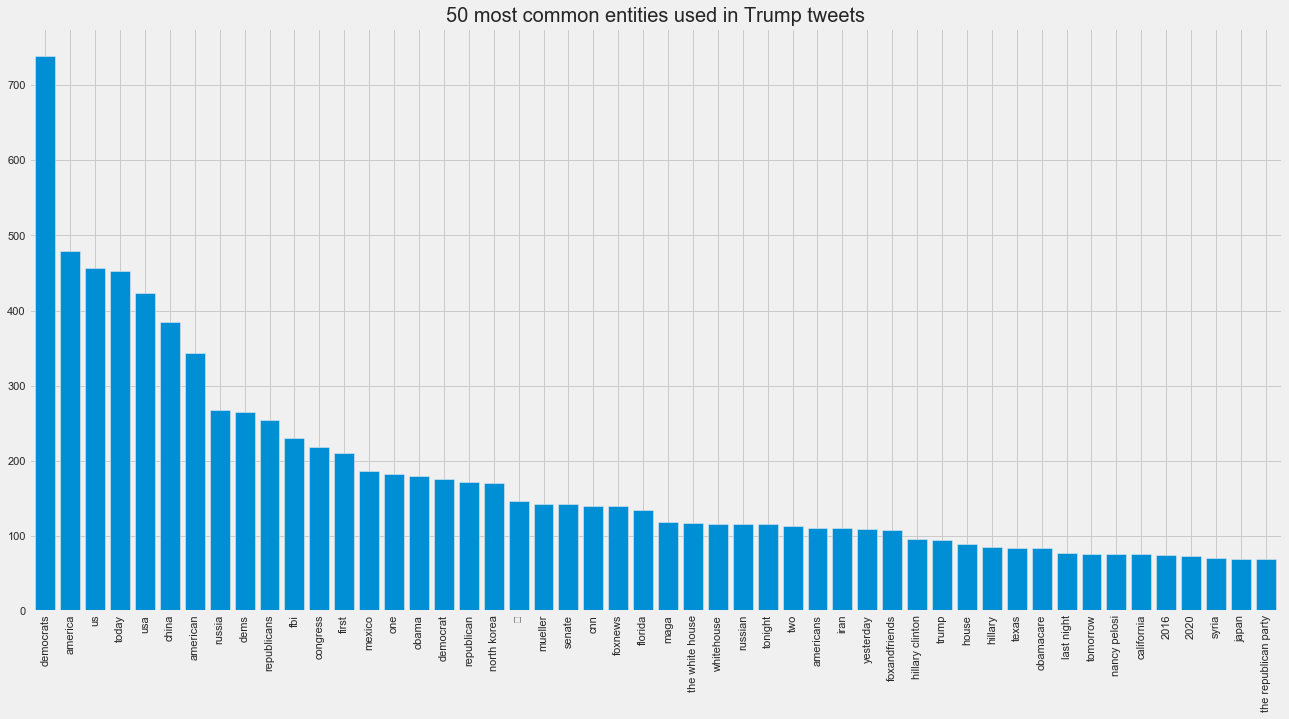

In [21]:
entity_counter = Counter(all_ents_text)
entity_counter = pd.Series(entity_counter).sort_values(ascending=False)
entity_counter[:50]

plt.figure(figsize=(20,10))
plt.bar(entity_counter[:50].index, entity_counter[:50])
plt.xticks(rotation=90)
plt.margins(x=0.005)
plt.title("50 most common entities used in Trump tweets", fontsize=20)

(-0.5, 399.5, 199.5, -0.5)

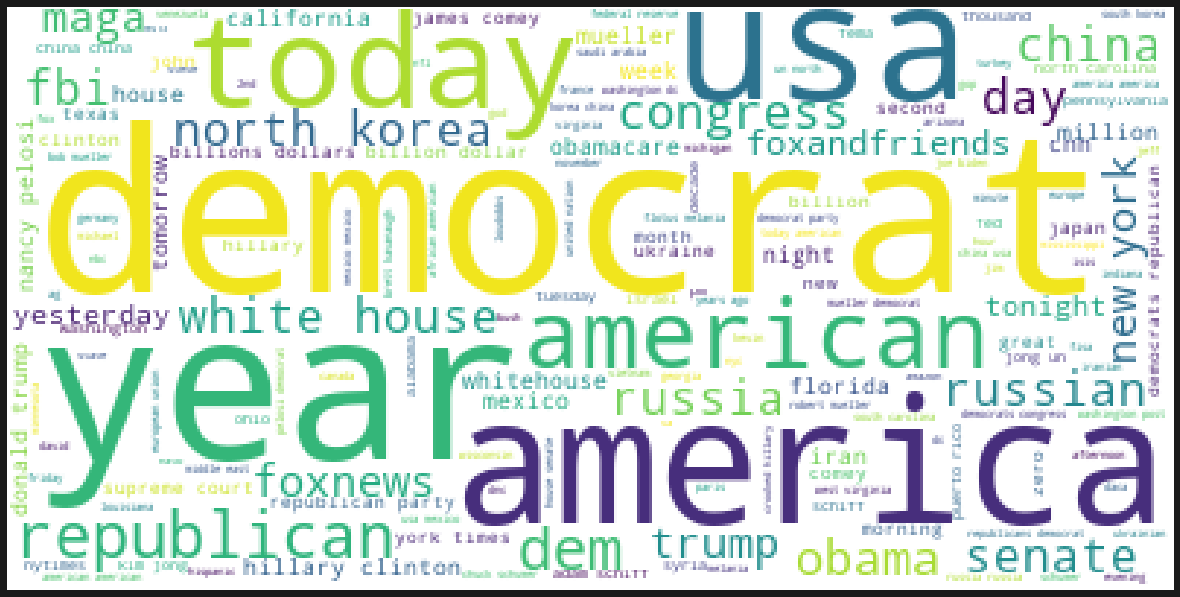

In [22]:
wcloud = wordcloud.WordCloud(background_color="white",stopwords=stopwords).generate(str(all_ents_text).replace("'","").replace('[','').replace(']',''))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wcloud)
plt.axis("off")

Text(0.5, 1.0, '50 most common persons used in Trump tweets')

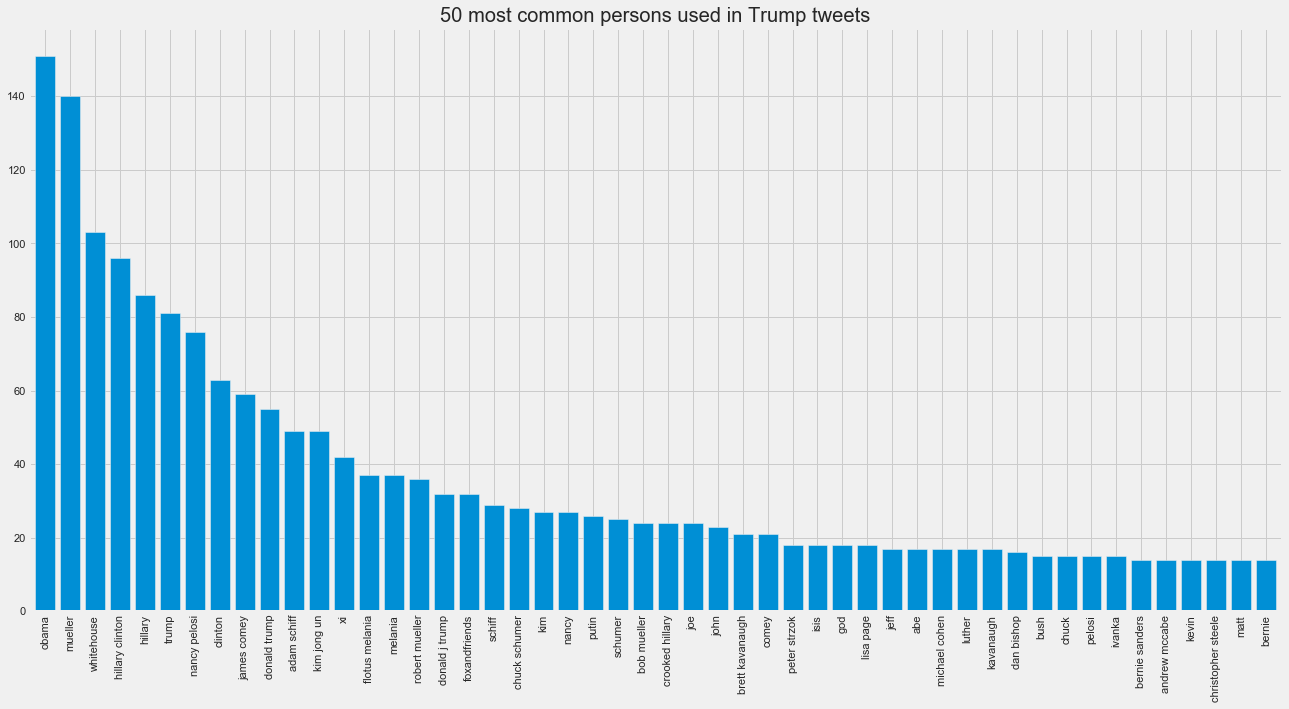

In [23]:
entities_person = list(itertools.compress(all_ents_text, [ent_type=='PERSON' for ent_type in all_ents_type]))
entity_person_counter = Counter(entities_person)
entity_person_counter = pd.Series(entity_person_counter).sort_values(ascending=False)
entity_person_counter[:50]

plt.figure(figsize=(20,10))
plt.bar(entity_person_counter[:50].index, entity_person_counter[:50])
plt.xticks(rotation=90)
plt.margins(x=0.005)
plt.title("50 most common persons used in Trump tweets")

(-0.5, 399.5, 199.5, -0.5)

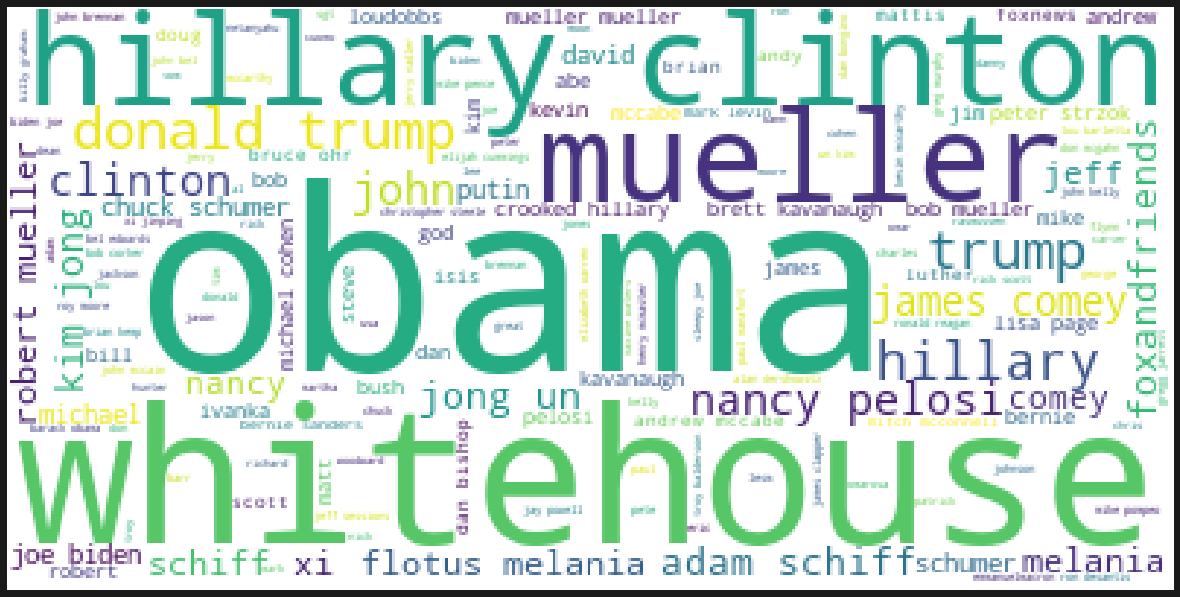

In [24]:
wcloud = wordcloud.WordCloud(background_color="white",stopwords=stopwords).generate(str(entities_person).replace("'","").replace('[','').replace(']',''))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wcloud)
plt.axis("off")

Text(0.5, 1.0, '50 most common organization used in Trump tweets')

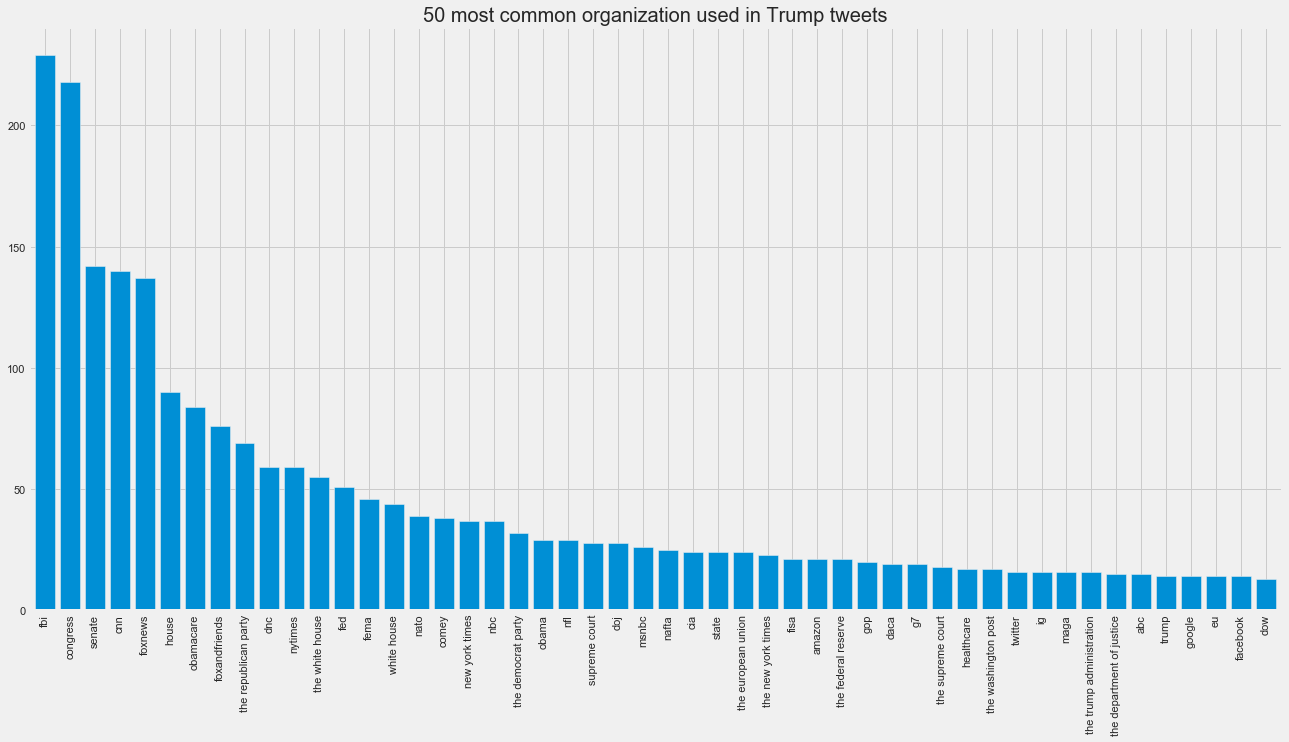

In [25]:
entities_organization = list(itertools.compress(all_ents_text, [ent_type=='ORG' for ent_type in all_ents_type]))
entity_organization_counter = Counter(entities_organization)
entity_organization_counter = pd.Series(entity_organization_counter).sort_values(ascending=False)
entity_organization_counter[:50]

plt.figure(figsize=(20,10))
plt.bar(entity_organization_counter[:50].index, entity_organization_counter[:50])
plt.xticks(rotation=90)
plt.margins(x=0.005)
plt.title("50 most common organization used in Trump tweets", fontsize=20)

(-0.5, 399.5, 199.5, -0.5)

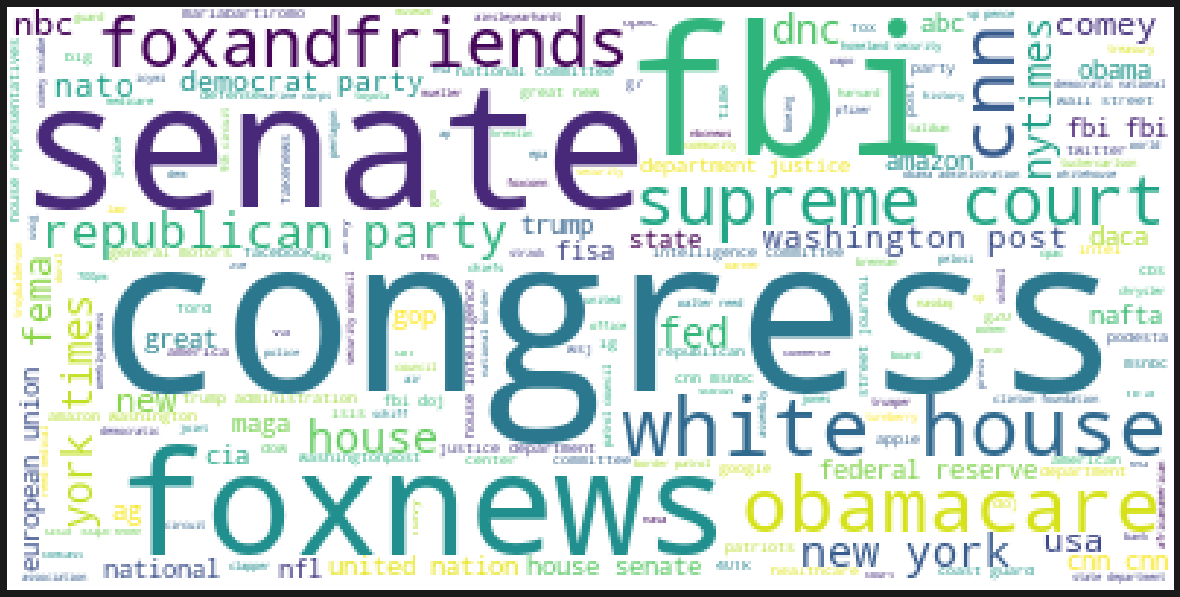

In [26]:
wcloud = wordcloud.WordCloud(background_color="white",stopwords=stopwords).generate(str(entities_organization).replace("'","").replace('[','').replace(']',''))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wcloud)
plt.axis("off")

Text(0.5, 1.0, '50 most common location used in Trump tweets')

/Users/wyssuser/.local/share/virtualenvs/project-zWm4Kl86/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 127909 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/wyssuser/.local/share/virtualenvs/project-zWm4Kl86/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 127909 missing from current font.
  font.load_char(ord(s), flags=flags)


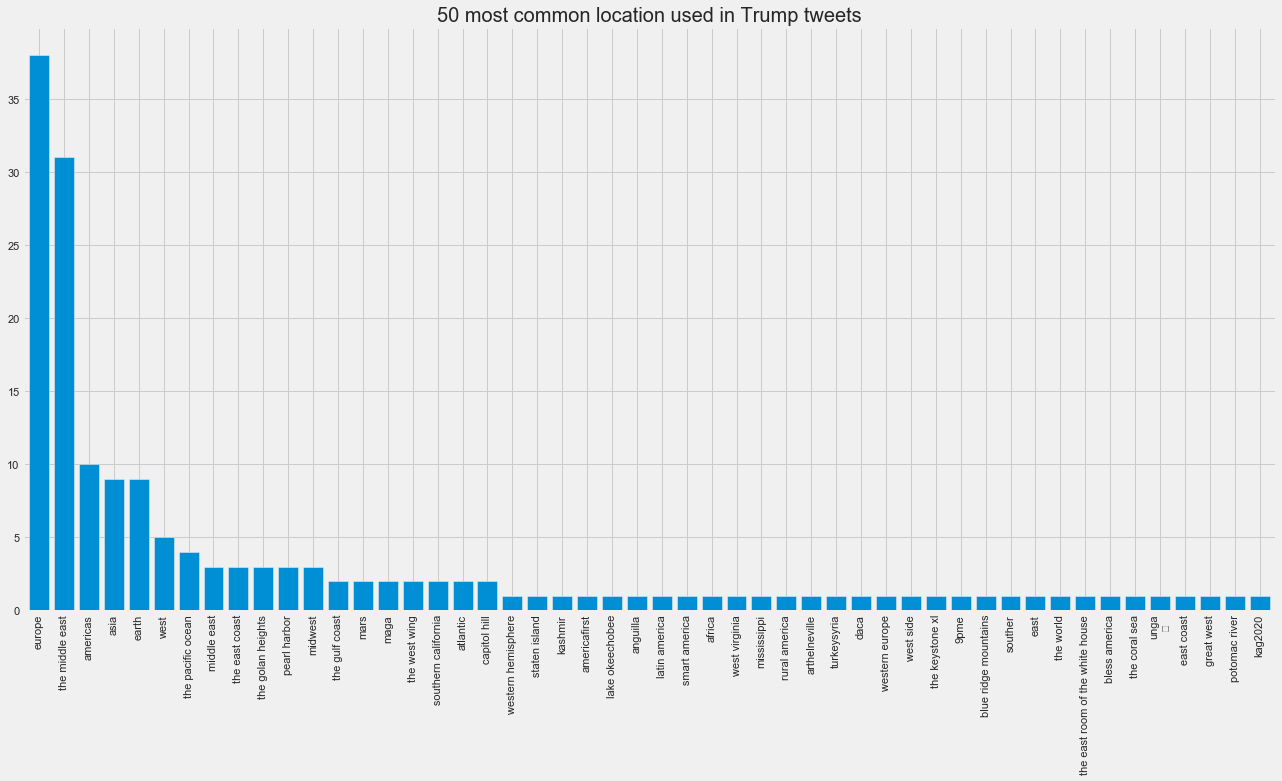

In [27]:
entities_location = list(itertools.compress(all_ents_text, [ent_type=='LOC' for ent_type in all_ents_type]))
entity_location_counter = Counter(entities_location)
entity_location_counter = pd.Series(entity_location_counter).sort_values(ascending=False)
entity_location_counter[:50]

plt.figure(figsize=(20,10))
plt.bar(entity_location_counter[:50].index, entity_location_counter[:50])
plt.xticks(rotation=90)
plt.margins(x=0.005)
plt.title("50 most common location used in Trump tweets", fontsize=20)

(-0.5, 399.5, 199.5, -0.5)

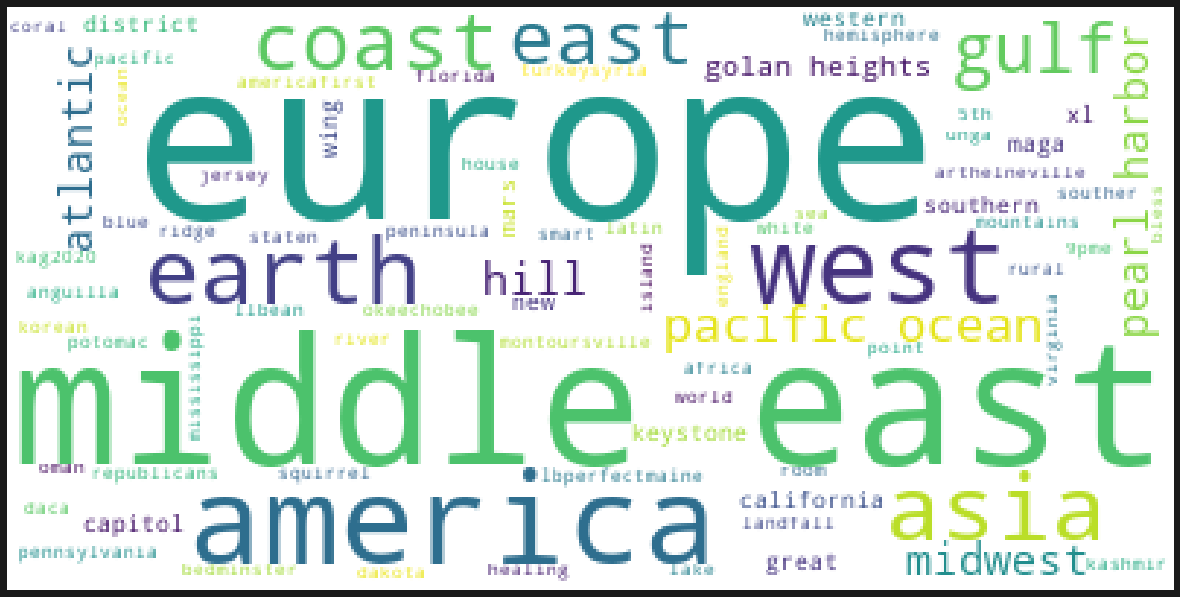

In [28]:
wcloud = wordcloud.WordCloud(background_color="white",stopwords=stopwords).generate(str(entities_location).replace("'","").replace('[','').replace(']',''))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wcloud)
plt.axis("off")

Text(0.5, 1.0, '50 most common country used in Trump tweets')

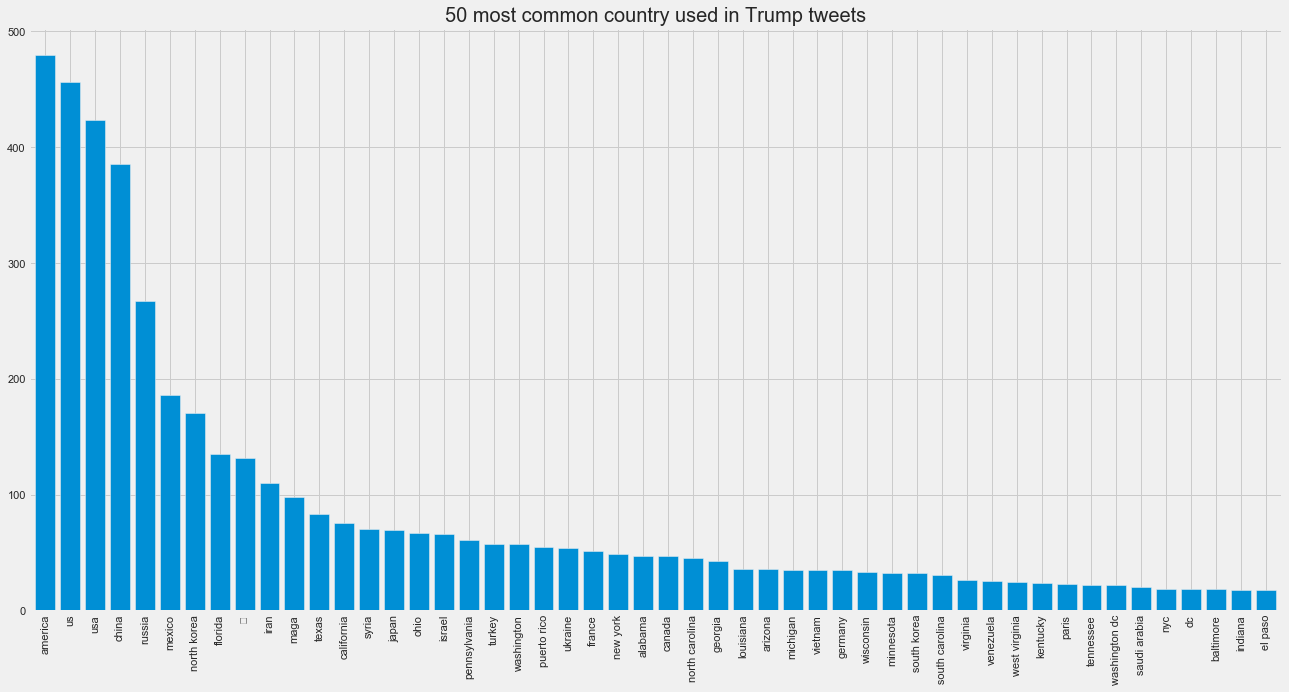

In [29]:
entities_country = list(itertools.compress(all_ents_text, [ent_type=='GPE' for ent_type in all_ents_type]))
entity_country_counter = Counter(entities_country)
entity_country_counter = pd.Series(entity_country_counter).sort_values(ascending=False)
entity_country_counter[:50]

plt.figure(figsize=(20,10))
plt.bar(entity_country_counter[:50].index, entity_country_counter[:50])
plt.xticks(rotation=90)
plt.margins(x=0.005)
plt.title("50 most common country used in Trump tweets", fontsize=20)

(-0.5, 399.5, 199.5, -0.5)

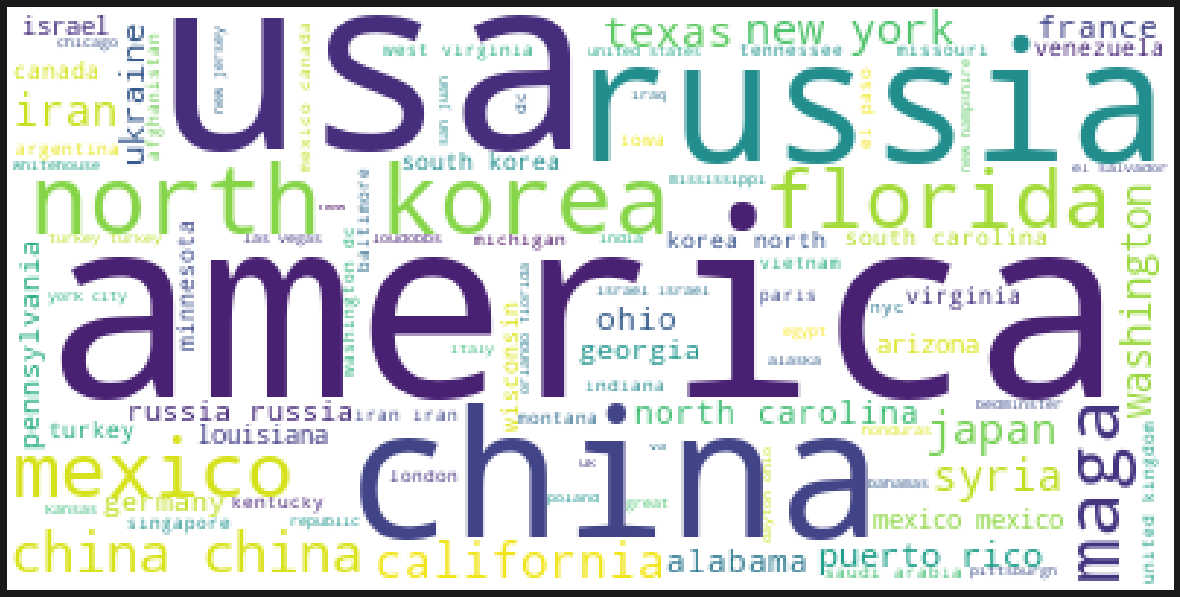

In [30]:
wcloud = wordcloud.WordCloud(background_color="white",stopwords=stopwords).generate(str(entities_country).replace("'","").replace('[','').replace(']',''))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wcloud)
plt.axis("off")

In [31]:
list(bigrams(df.tokens[0]))

[('yesterday', 'pittsburgh'),
 ('pittsburgh', 'impressed'),
 ('impressed', 'congressman'),
 ('congressman', 'keith'),
 ('keith', 'rothfus'),
 ('rothfus', 'far'),
 ('far', 'local'),
 ('local', 'political'),
 ('political', 'figure'),
 ('figure', 'sincere'),
 ('sincere', 'level'),
 ('level', 'compassion'),
 ('compassion', 'grief'),
 ('grief', 'sorrow'),
 ('sorrow', 'events'),
 ('events', 'took'),
 ('took', 'place'),
 ('place', 'way'),
 ('way', 'inspiring'),
 ('inspiring', 'vote'),
 ('vote', 'keith')]

In [32]:
# Create list of lists containing bigrams in tweets
def bigram_splitter(row):
    row = list(bigrams(row))
    return row

df['bigrams'] = df['tokens'].apply(bigram_splitter)

/Users/wyssuser/.local/share/virtualenvs/project-zWm4Kl86/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, '50 most common bigrams used in Trump tweets')

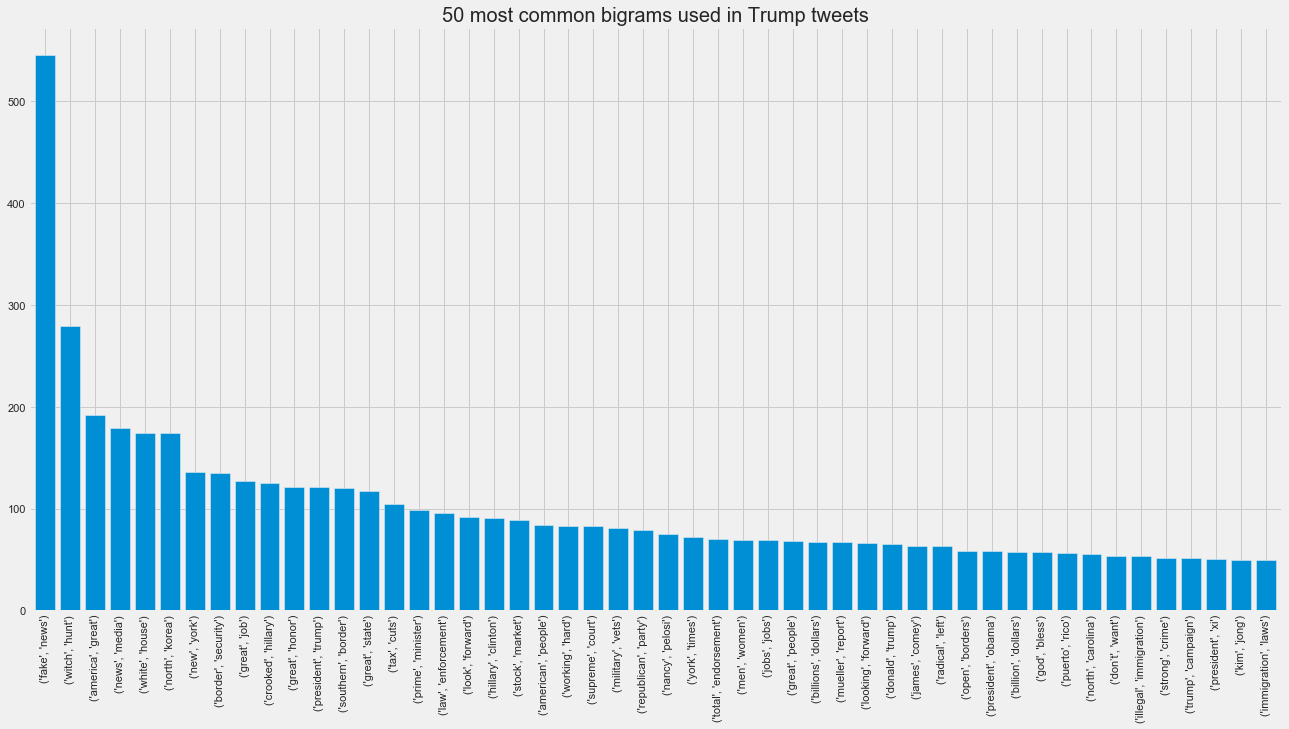

In [33]:
bigram_counts = pd.Series(Counter(list(itertools.chain(*list(df['bigrams']))))).sort_values(ascending=False)
bigram_counts_mod_index = bigram_counts.copy()
bigram_counts_mod_index.index = [str(bi) for bi in bigram_counts.index]
plt.figure(figsize=(20,10))
plt.bar(bigram_counts_mod_index[:50].index, bigram_counts_mod_index[:50])
plt.xticks(rotation=90)
plt.margins(x=0.005)
plt.title("50 most common bigrams used in Trump tweets", fontsize=20)

In [34]:
bigram_counts[:50]

fake         news           545
witch        hunt           279
america      great          192
news         media          179
white        house          174
north        korea          174
new          york           136
border       security       135
great        job            127
crooked      hillary        125
great        honor          121
president    trump          121
southern     border         120
great        state          117
tax          cuts           105
prime        minister        99
law          enforcement     96
look         forward         92
hillary      clinton         91
stock        market          89
american     people          84
working      hard            83
supreme      court           83
military     vets            81
republican   party           79
nancy        pelosi          75
york         times           72
total        endorsement     70
men          women           69
jobs         jobs            69
great        people          68
billions

In [35]:
df['sentiment_polarity'] = [TextBlob(row).polarity for row in df['cleared_text']]

/Users/wyssuser/.local/share/virtualenvs/project-zWm4Kl86/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 0.98, 'Distribution of polarity on all tweets')

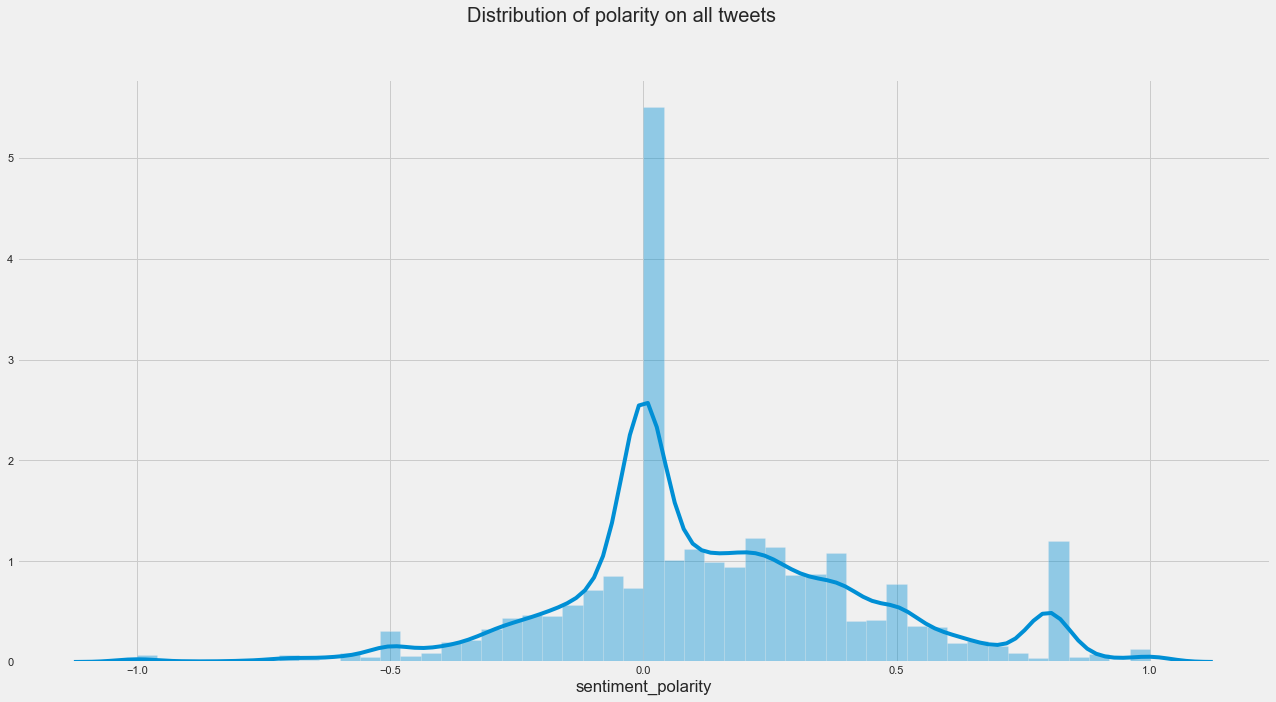

In [36]:
fit = plt.figure(figsize=(20,10))
sns.distplot(df['sentiment_polarity'])
plt.suptitle('Distribution of polarity on all tweets', fontsize=20)

In [37]:
total_sentiment_mean = df['sentiment_polarity'].mean()

In [38]:
def extract_country(row):
    all_ents = row.ents
    all_ents_text = [ent.text for ent in all_ents]
    all_ents_type = [ent.label_ for ent in all_ents]
    entities_country = " ".join(list(itertools.compress(all_ents_text, [ent_type=='GPE' for ent_type in all_ents_type])))
    return entities_country

df['country'] = df['spacy_doc'].apply(extract_country)

/Users/wyssuser/.local/share/virtualenvs/project-zWm4Kl86/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
df[df['country'].str.contains("china")]

created_at                                          full_text                                           entities in_reply_to_screen_name                                             source  retweet_count  favorite_count                                       cleared_text                                             tokens                                    text_lemmatized                                          spacy_doc                                            bigrams  sentiment_polarity                                            country
21   2017-11-08 15:40:40+00:00  Looking forward to a full day of meetings with...  {'hashtags': [], 'symbols': [], 'user_mentions...                    None  <a href="http://twitter.com" rel="nofollow">Tw...          11501           57965  looking forward to a full day of meetings with...  [looking, forward, day, meetings, president, x...  [looking, forward, day, meeting, president, xi...  (looking, forward, to, a, full, day, of, meeti...  [(looking, forward), (forward, day), (day, mee...        6.666667e-01                                              china
45   2018-12-14 16:35:43+00:00  China just announced that their economy is gro...  {'hashtags': [], 'symbols': [], 'user_mentions...                    None  <a href="http://twitter.com/download/iphone" r...          24655          120954  china just announced that their economy is gro...  [china, announced, economy, growing, slower, a...  [china, announced, economy, growing, slower, a...  (china, just, announced, that, their, economy,...  [(china, announced), (announced, economy), (ec...        1.600000e-01                                     china us china
60   2019-02-25 20:12:25+00:00  China Trade Deal (and more) in advanced stages...  {'hashtags': [], 'symbols': [], 'user_mentions...                    None  <a href="http://twitter.com/download/iphone" r...          14785           75877  china trade deal and more in advanced stages r...  [china, trade, deal, advanced, stages, relatio...  [china, trade, deal, advanced, stage, relation...  (china, trade, deal, and, more, in, advanced, ...  [(china, trade), (trade, deal), (deal, advance...        4.877778e-01                                           china us
61   2017-03-17 13:07:15+00:00  North Korea is behaving very badly. They have ...  {'hashtags': [], 'symbols': [], 'user_mentions...                    None  <a href="http://twitter.com/download/iphone" r...          18048           79206  north korea is behaving very badly they have b...  [north, korea, behaving, badly, playing, usa, ...  [north, korea, behaving, badly, playing, usa, ...  (north, korea, is, behaving, very, badly, they...  [(north, korea), (korea, behaving), (behaving,...       -5.487500e-01                              north korea usa china
88   2019-05-08 12:48:15+00:00  The reason for the China pullback &amp; attemp...  {'hashtags': [], 'symbols': [], 'user_mentions...                    None  <a href="http://twitter.com/download/iphone" r...          19494           81530  the reason for the china pullback  attempted r...  [reason, china, pullback, attempted, renegotia...  [reason, china, pullback, attempted, renegotia...  (the, reason, for, the, china, pullback,  , at...  [(reason, china), (china, pullback), (pullback...        1.708333e-01                                          china usa
91   2018-04-09 10:03:16+00:00  When a car is sent to the United States from C...  {'hashtags': [], 'symbols': [], 'user_mentions...                    None  <a href="http://twitter.com/download/iphone" r...          40739          160740  when a car is sent to usa from china there is ...  [car, sent, usa, china, tariff, paid, 2, 12, c...  [car, sent, usa, china, tariff, paid, 2, 12, c...  (when, a, car, is, sent, to, usa, from, china,...  [(car, sent), (sent, usa), (usa, china), (chin...        1.750000e-01                                usa china china usa
97   2019-10-31 14:37:45+00:00  ....our manufacturers. We should 

Mean sentimetn for China 0.1409532795406564
Which is differs by -0.0027234643034616257 from mean of all tweets


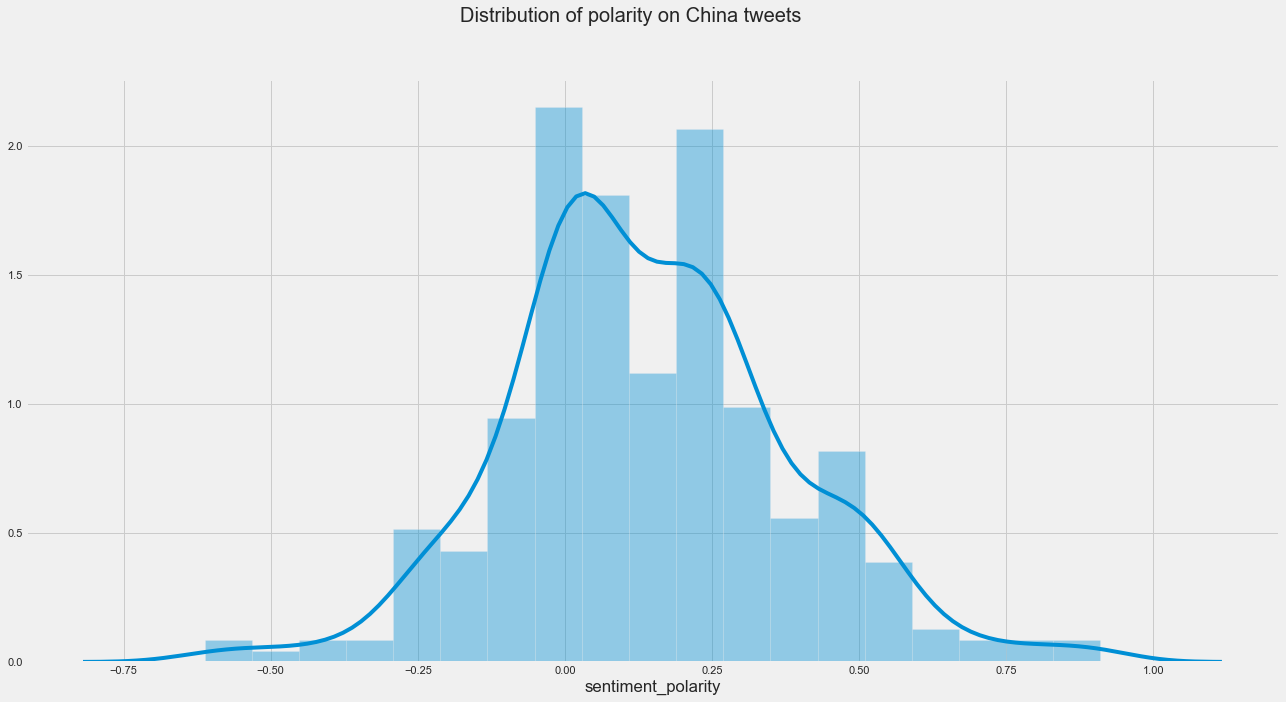

In [40]:
fit = plt.figure(figsize=(20,10))
sns.distplot(df[df['country'].str.contains("china")]['sentiment_polarity'])
plt.suptitle('Distribution of polarity on China tweets', fontsize=20)
print('Mean sentimetn for China', df[df['country'].str.contains("china")]['sentiment_polarity'].mean())
print(f'Which is differs by {df[df["country"].str.contains("china")]["sentiment_polarity"].mean() - total_sentiment_mean} from mean of all tweets')

In [41]:
fit = plt.figure(figsize=(20,10))
sns.distplot(df[df['country'].str.contains("north korea")]['sentiment_polarity'])
plt.suptitle('Distribution of polarity on North Korea tweets', fontsize=20)
print('Mean sentimetn for North Korea', df[df['country'].str.contains("north korea")]['sentiment_polarity'].mean())
print(f'Which is differs by {df[df["country"].str.contains("north korea")]["sentiment_polarity"].mean() - total_sentiment_mean} from mean of all tweets')

Mean sentimetn for North Korea 0.17651836824540468
Which is differs by 0.032841624401286656 from mean of all tweets


Mean sentimetn for Russia 0.011370279846677362
Which is differs by -0.13230646399744067 from mean of all tweets


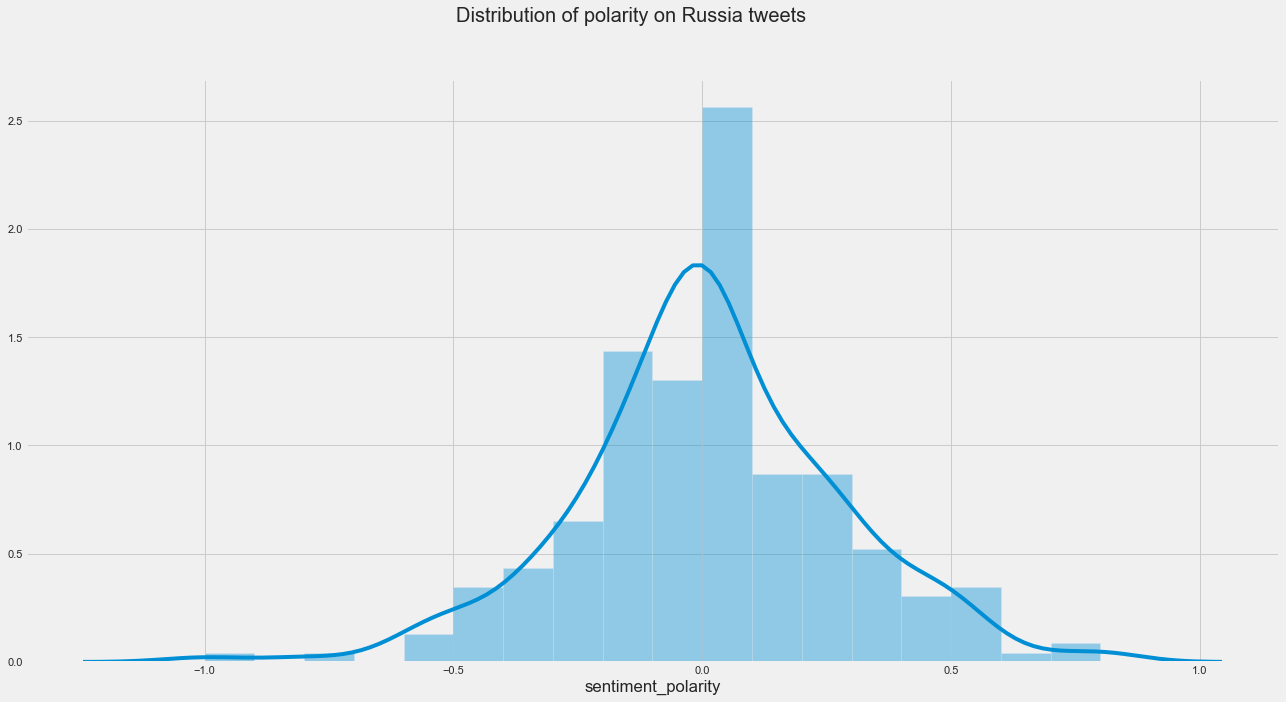

In [42]:
fit = plt.figure(figsize=(20,10))
sns.distplot(df[df['country'].str.contains("russia")]['sentiment_polarity'])
plt.suptitle('Distribution of polarity on Russia tweets', fontsize=20)

print('Mean sentimetn for Russia', df[df['country'].str.contains("russia")]['sentiment_polarity'].mean())
print(f'Which is differs by {df[df["country"].str.contains("russia")]["sentiment_polarity"].mean() - total_sentiment_mean} from mean of all tweets')

In [43]:
fit = plt.figure(figsize=(20,10))
sns.distplot(df[df['country'].str.contains("mexico")]['sentiment_polarity'])
plt.suptitle('Distribution of polarity on Mexico tweets', fontsize=20)
print('Mean sentimetn for Mexico', df[df['country'].str.contains("mexico")]['sentiment_polarity'].mean())
print(f'Which is differs by {df[df["country"].str.contains("mexico")]["sentiment_polarity"].mean() - total_sentiment_mean} from mean of all tweets')

Mean sentimetn for Mexico 0.08251936869119034
Which is differs by -0.061157375152927684 from mean of all tweets


Mean sentimetn for Syria 0.07759754699611256
Which is differs by -0.06607919684800546 from mean of all tweets


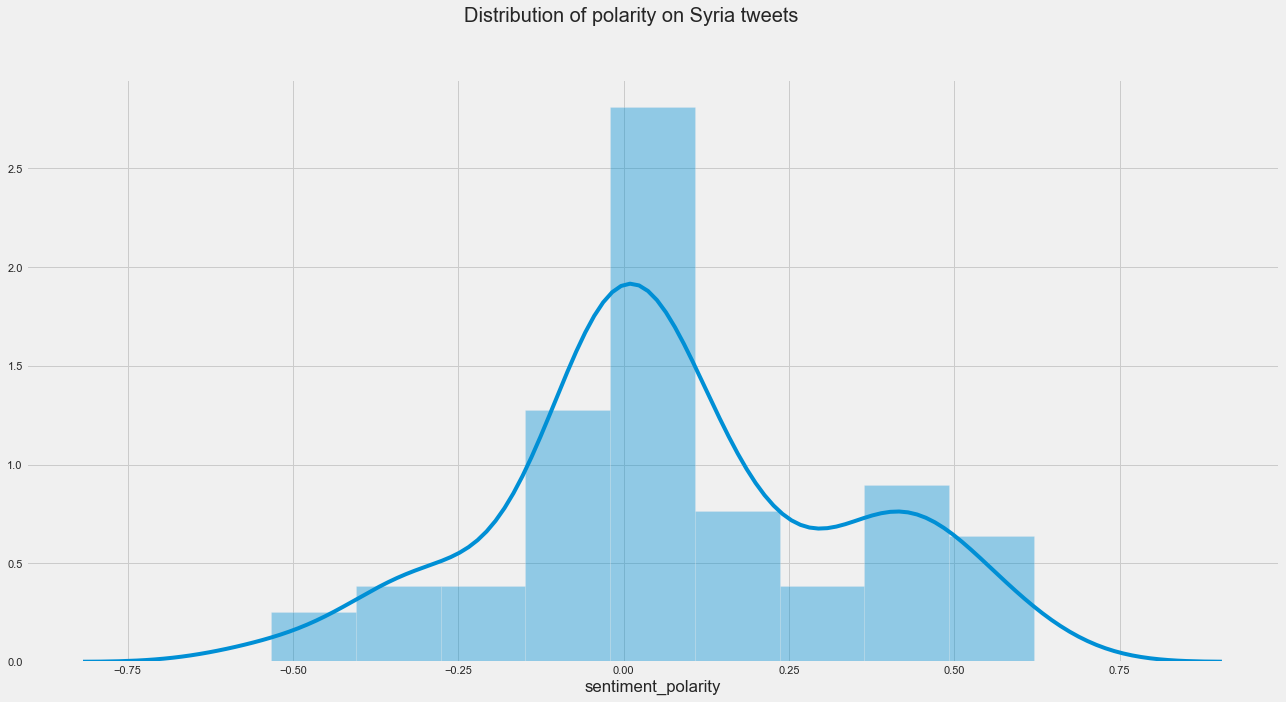

In [44]:
fit = plt.figure(figsize=(20,10))
sns.distplot(df[df['country'].str.contains("syria")]['sentiment_polarity'])
plt.suptitle('Distribution of polarity on Syria tweets', fontsize=20)
print('Mean sentimetn for Syria', df[df['country'].str.contains("syria")]['sentiment_polarity'].mean())
print(f'Which is differs by {df[df["country"].str.contains("syria")]["sentiment_polarity"].mean() - total_sentiment_mean} from mean of all tweets')

Mean sentimetn for Iran -0.02793629860865012
Which is differs by -0.17161304245276815 from mean of all tweets


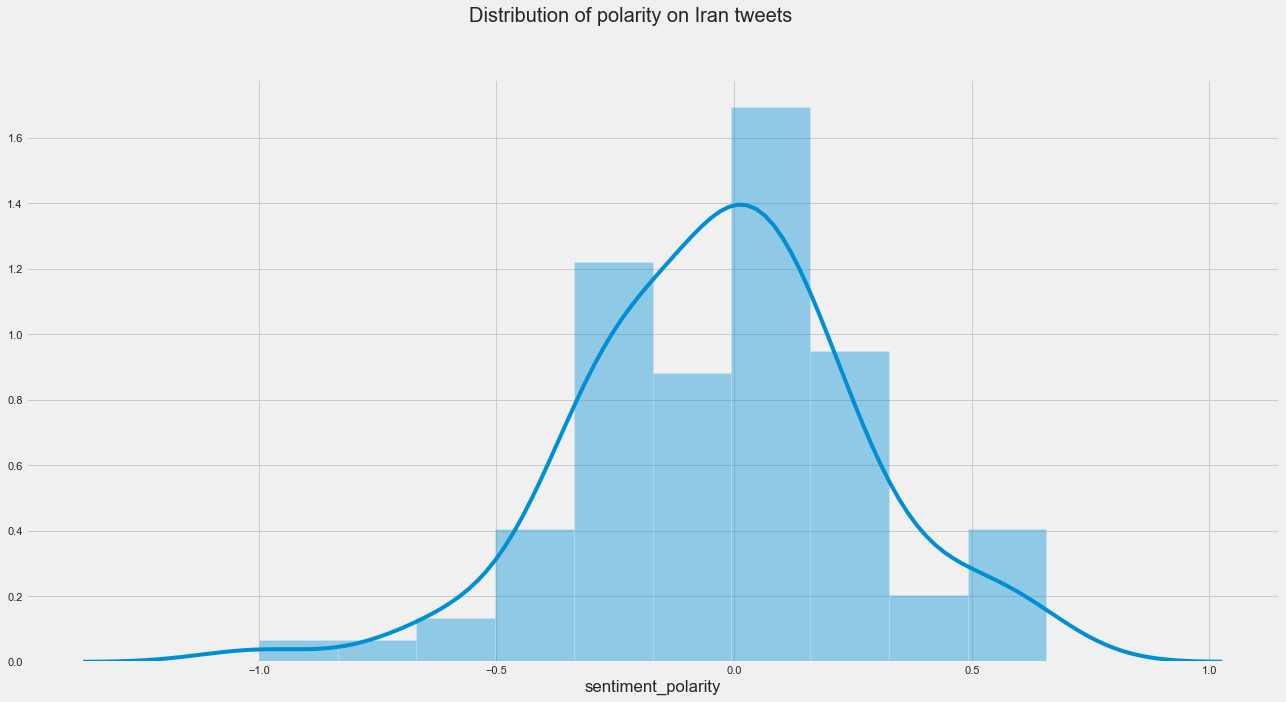

In [45]:
fit = plt.figure(figsize=(20,10))
sns.distplot(df[df['country'].str.contains("iran")]['sentiment_polarity'])
plt.suptitle('Distribution of polarity on Iran tweets', fontsize=20)
print('Mean sentimetn for Iran', df[df['country'].str.contains("iran")]['sentiment_polarity'].mean())
print(f'Which is differs by {df[df["country"].str.contains("iran")]["sentiment_polarity"].mean() - total_sentiment_mean} from mean of all tweets')

In [46]:
fit = plt.figure(figsize=(20,10))
sns.distplot(df[df['country'].str.contains("(ameraica)|(us)|(usa)")]['sentiment_polarity'])
plt.suptitle('Distribution of polarity on USA with other countires tweets', fontsize=20)

/Users/wyssuser/.local/share/virtualenvs/project-zWm4Kl86/lib/python3.7/site-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


Text(0.5, 0.98, 'Distribution of polarity on USA with other countires tweets')

In [47]:
df[df['country'].str.contains("(?=((ameraica)|(us)|(usa)))(?=(^china|^north|^russia|^mexico))", regex=True)]

Empty DataFrame
Columns: [created_at, full_text, entities, in_reply_to_screen_name, source, retweet_count, favorite_count, cleared_text, tokens, text_lemmatized, spacy_doc, bigrams, sentiment_polarity, country]
Index: []

In [48]:
def extract_person(row):
    all_ents = row.ents
    all_ents_text = [ent.text for ent in all_ents]
    all_ents_type = [ent.label_ for ent in all_ents]
    entities_country = " ".join(list(itertools.compress(all_ents_text, [ent_type=='PERSON' for ent_type in all_ents_type])))
    return entities_country

df['person'] = df['spacy_doc'].apply(extract_person)

/Users/wyssuser/.local/share/virtualenvs/project-zWm4Kl86/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [49]:
def extract_organization(row):
    all_ents = row.ents
    all_ents_text = [ent.text for ent in all_ents]
    all_ents_type = [ent.label_ for ent in all_ents]
    entities_country = " ".join(list(itertools.compress(all_ents_text, [ent_type=='ORG' for ent_type in all_ents_type])))
    return entities_country

df['organization'] = df['spacy_doc'].apply(extract_organization)

/Users/wyssuser/.local/share/virtualenvs/project-zWm4Kl86/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [50]:
df

created_at                                          full_text                                           entities in_reply_to_screen_name                                             source  retweet_count  favorite_count                                       cleared_text                                             tokens                                    text_lemmatized                                          spacy_doc                                            bigrams  sentiment_polarity                    country               person       organization
0    2018-10-31 19:24:22+00:00  Yesterday in Pittsburgh I was really impressed...  {'hashtags': [], 'symbols': [], 'user_mentions...                    None  <a href="http://twitter.com/download/iphone" r...          13036           57519  yesterday in pittsburgh i was really impressed...  [yesterday, pittsburgh, impressed, congressman...  [yesterday, pittsburgh, impressed, congressman...  (yesterday, in, pittsburgh, i, was, really, im...  [(yesterday, pittsburgh), (pittsburgh, impress...            0.242500                 pittsburgh  keith rothfus keith                   
1    2018-01-25 00:27:00+00:00  Will soon be heading to Davos, Switzerland, to...  {'hashtags': [], 'symbols': [], 'user_mentions...                    None  <a href="http://twitter.com/download/iphone" r...          24215          138214  will soon be heading to davos switzerland to t...  [soon, heading, davos, switzerland, tell, worl...  [soon, heading, davos, switzerland, tell, worl...  (will, soon, be, heading, to, davos, switzerla...  [(soon, heading), (heading, davos), (davos, sw...            0.433333          davos switzerland                                        
2    2018-09-22 01:05:00+00:00  Thank you Missouri - I love you!\nhttps://t.co...  {'hashtags': [], 'symbols': [], 'user_mentions...                    None  <a href="http://twitter.com/download/iphone" r...          13068           55764                   thank you missouri  i love you\n                            [thank, missouri, love]                            [thank, missouri, love]        (thank, you, missouri,  , i, love, you, \n)              [(thank, missouri), (missouri, love)]            0.500000                   missouri                                        
3    2018-01-04 11:11:45+00:00  As Americans, you need identification, sometim...  {'hashtags': [], 'symbols': [], 'user_mentions...                    None  <a href="http://twitter.com/download/iphone" r...          34630          139844  as americans you need identification sometimes...  [americans, need, identification, strong, accu...  [american, need, identification, strong, accur...  (as, americans, you, need, identification, som...  [(americans, need), (need, identification), (i...            0.314333                                                                   
4    2017-06-16 22:32:20+00:00  "National Security Presidential Memorandum on ...  {'hashtags': [], 'symbols': [], 'user_mentions...                    None  <a href="http://twitter.com/download/iphone" r...           8070           39011  national security presidential memorandum on s...  [national, security, presidential, memorandum,...  [national, security, presidential, memorandum,...  (national, security, presidential, memorandum,...  [(national, security), (security, presidential...            0.000000                   usa cuba                       national security
...                        ...                                                ...                                                ...                     ...                                                ...            ...             ...                                                ...                                                ...                                                ...                                                ...                                                ...                 ...                     

In [51]:
fit = plt.figure(figsize=(20,10))
sns.distplot(df[df['organization'].str.contains("foxnews")]['sentiment_polarity'])
plt.suptitle('Distribution of polarity on FoxNews tweets', fontsize=20)
print('Mean sentimetn for FoxNews', df[df['organization'].str.contains("foxnews")]['sentiment_polarity'].mean())
print(f'Which is differs by {df[df["organization"].str.contains("foxnews")]["sentiment_polarity"].mean() - total_sentiment_mean} from mean of all tweets')

Mean sentimetn for FoxNews 0.08167278597459776
Which is differs by -0.06200395786952026 from mean of all tweets


Mean sentimetn for CNN -0.10472849736513379
Which is differs by -0.2484052412092518 from mean of all tweets


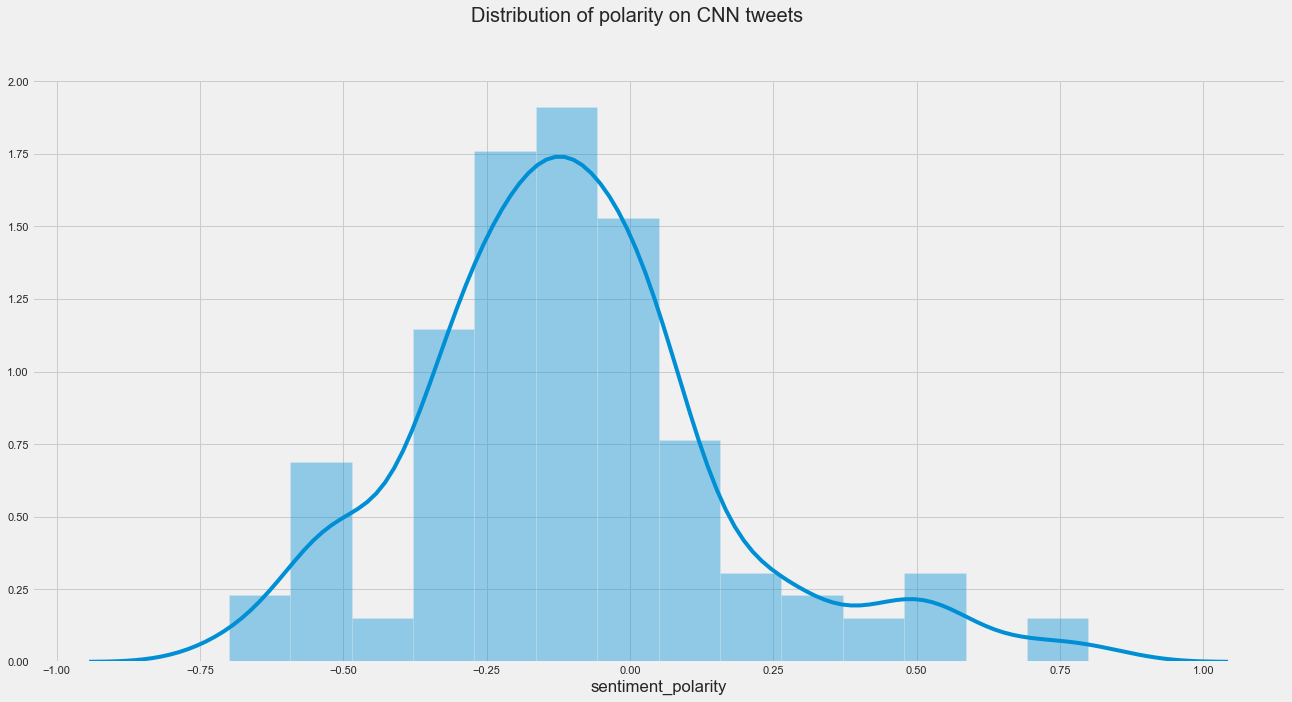

In [52]:
fit = plt.figure(figsize=(20,10))
sns.distplot(df[df['organization'].str.contains("cnn")]['sentiment_polarity'])
plt.suptitle('Distribution of polarity on CNN tweets', fontsize=20)
print('Mean sentimetn for CNN', df[df['organization'].str.contains("cnn")]['sentiment_polarity'].mean())
print(f'Which is differs by {df[df["organization"].str.contains("cnn")]["sentiment_polarity"].mean() - total_sentiment_mean} from mean of all tweets')

In [53]:
fit = plt.figure(figsize=(20,10))
sns.distplot(df[df['organization'].str.contains("senate")]['sentiment_polarity'])
plt.suptitle('Distribution of polarity on Senate tweets', fontsize=20)
print('Mean sentimetn for Senate', df[df['organization'].str.contains("senate")]['sentiment_polarity'].mean())
print(f'Which is differs by {df[df["organization"].str.contains("senate")]["sentiment_polarity"].mean() - total_sentiment_mean} from mean of all tweets')

Mean sentimetn for Senate 0.18227367559074373
Which is differs by 0.03859693174662571 from mean of all tweets


Mean sentimetn for FBI 0.005224599656865665
Which is differs by -0.13845214418725235 from mean of all tweets


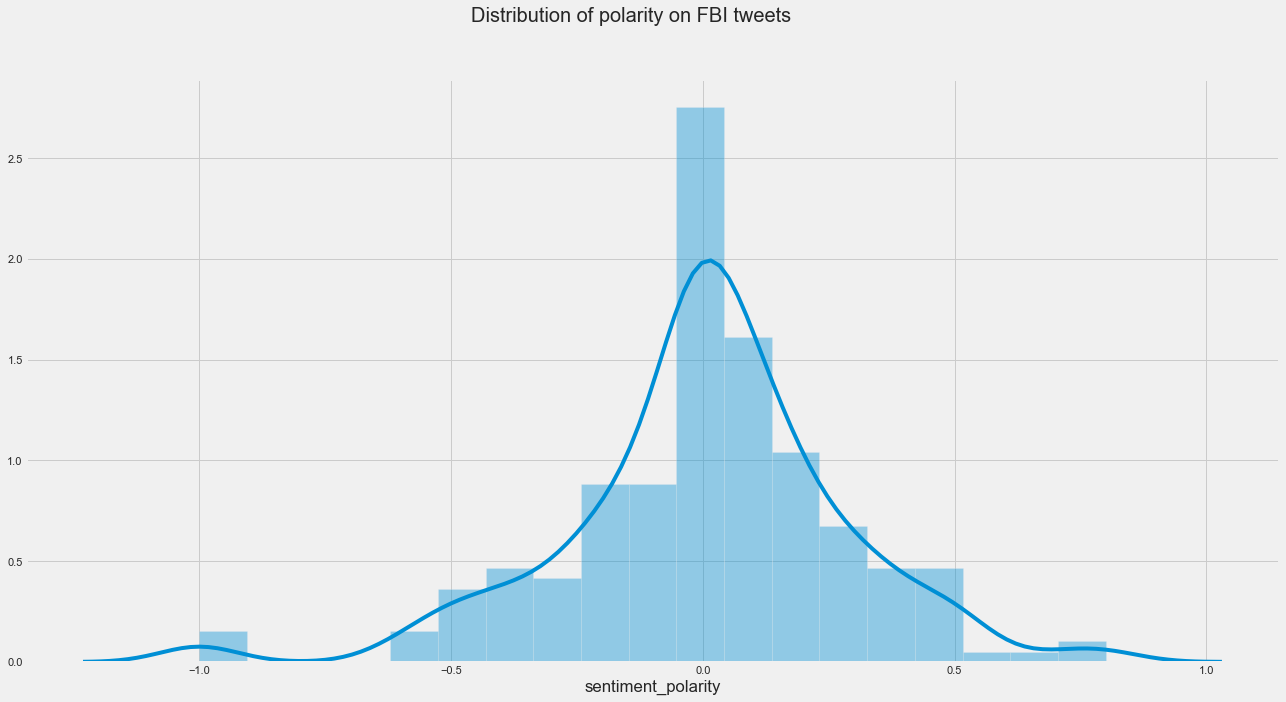

In [54]:
fit = plt.figure(figsize=(20,10))
sns.distplot(df[df['organization'].str.contains("fbi")]['sentiment_polarity'])
plt.suptitle('Distribution of polarity on FBI tweets', fontsize=20)
print('Mean sentimetn for FBI', df[df['organization'].str.contains("fbi")]['sentiment_polarity'].mean())
print(f'Which is differs by {df[df["organization"].str.contains("fbi")]["sentiment_polarity"].mean() - total_sentiment_mean} from mean of all tweets')

In [55]:
# Create list of lists containing bigrams in tweets
def trigram_splitter(row):
    row = list(trigrams(row))
    return row

df['trigrams'] = df['tokens'].apply(trigram_splitter)

/Users/wyssuser/.local/share/virtualenvs/project-zWm4Kl86/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [56]:
trigram_counts = pd.Series(Counter(list(itertools.chain(*list(df['trigrams']))))).sort_values(ascending=False)
trigram_counts_mod_index = trigram_counts.copy()
trigram_counts_mod_index.index = [str(tri) for tri in trigram_counts.index]
plt.figure(figsize=(20,10))
plt.bar(trigram_counts_mod_index[:50].index, trigram_counts_mod_index[:50])
plt.xticks(rotation=90)
plt.margins(x=0.005)
plt.title("50 most common trigrams used in Trump tweets", fontsize=20)

Text(0.5, 1.0, '50 most common trigrams used in Trump tweets')

In [57]:
df.head()

created_at                                          full_text                                           entities in_reply_to_screen_name                                             source  retweet_count  favorite_count                                       cleared_text                                             tokens                                    text_lemmatized                                          spacy_doc                                            bigrams  sentiment_polarity            country               person       organization                                           trigrams
0 2018-10-31 19:24:22+00:00  Yesterday in Pittsburgh I was really impressed...  {'hashtags': [], 'symbols': [], 'user_mentions...                    None  <a href="http://twitter.com/download/iphone" r...          13036           57519  yesterday in pittsburgh i was really impressed...  [yesterday, pittsburgh, impressed, congressman...  [yesterday, pittsburgh, impressed, congressman...  (yesterday, in, pittsburgh, i, was, really, im...  [(yesterday, pittsburgh), (pittsburgh, impress...            0.242500         pittsburgh  keith rothfus keith                     [(yesterday, pittsburgh, impressed), (pittsbur...
1 2018-01-25 00:27:00+00:00  Will soon be heading to Davos, Switzerland, to...  {'hashtags': [], 'symbols': [], 'user_mentions...                    None  <a href="http://twitter.com/download/iphone" r...          24215          138214  will soon be heading to davos switzerland to t...  [soon, heading, davos, switzerland, tell, worl...  [soon, heading, davos, switzerland, tell, worl...  (will, soon, be, heading, to, davos, switzerla...  [(soon, heading), (heading, davos), (davos, sw...            0.433333  davos switzerland                                          [(soon, heading, davos), (heading, davos, swit...
2 2018-09-22 01:05:00+00:00  Thank you Missouri - I love you!\nhttps://t.co...  {'hashtags': [], 'symbols': [], 'user_mentions...                    None  <a href="http://twitter.com/download/iphone" r...          13068           55764                   thank you missouri  i love you\n                            [thank, missouri, love]                            [thank, missouri, love]        (thank, you, missouri,  , i, love, you, \n)              [(thank, missouri), (missouri, love)]            0.500000           missouri                                                                  [(thank, missouri, love)]
3 2018-01-04 11:11:45+00:00  As Americans, you need identification, sometim...  {'hashtags': [], 'symbols': [], 'user_mentions...                    None  <a href="http://twitter.com/download/iphone" r...          34630          139844  as americans you need identification sometimes...  [americans, need, identification, strong, accu...  [american, need, identification, strong, accur...  (as, americans, you, need, identification, som...  [(americans, need), (need, identification), (i...            0.314333                                                             [(americans, need, identification), (need, ide...
4 2017-06-16 22:32:20+00:00  "National Security Presidential Memorandum on ...  {'hashtags': [], 'symbols': [], 'user_mentions...                    None  <a href="http://twitter.com/download/iphone" r...           8070           39011  national security presidential memorandum on s...  [national, security, presidential, memorandum,...  [national, security, presidential, memorandum,...  (national, security, presidential, memorandum,...  [(national, security), (security, presidential...            0.000000           usa cuba                       national security  [(national, security, presidential), (security...

In [58]:
# df.to_pickle('tweet_sentiment.pkl')

_____________________

In [59]:
# tweets = pd.read_pickle('tweet_sentiment.pkl')
tweets = df
tweets['created_at'] = pd.to_datetime(tweets.created_at)
tweets.head()

created_at                                          full_text                                           entities in_reply_to_screen_name                                             source  retweet_count  favorite_count                                       cleared_text                                             tokens                                    text_lemmatized                                          spacy_doc                                            bigrams  sentiment_polarity            country               person       organization                                           trigrams
0 2018-10-31 19:24:22+00:00  Yesterday in Pittsburgh I was really impressed...  {'hashtags': [], 'symbols': [], 'user_mentions...                    None  <a href="http://twitter.com/download/iphone" r...          13036           57519  yesterday in pittsburgh i was really impressed...  [yesterday, pittsburgh, impressed, congressman...  [yesterday, pittsburgh, impressed, congressman...  (yesterday, in, pittsburgh, i, was, really, im...  [(yesterday, pittsburgh), (pittsburgh, impress...            0.242500         pittsburgh  keith rothfus keith                     [(yesterday, pittsburgh, impressed), (pittsbur...
1 2018-01-25 00:27:00+00:00  Will soon be heading to Davos, Switzerland, to...  {'hashtags': [], 'symbols': [], 'user_mentions...                    None  <a href="http://twitter.com/download/iphone" r...          24215          138214  will soon be heading to davos switzerland to t...  [soon, heading, davos, switzerland, tell, worl...  [soon, heading, davos, switzerland, tell, worl...  (will, soon, be, heading, to, davos, switzerla...  [(soon, heading), (heading, davos), (davos, sw...            0.433333  davos switzerland                                          [(soon, heading, davos), (heading, davos, swit...
2 2018-09-22 01:05:00+00:00  Thank you Missouri - I love you!\nhttps://t.co...  {'hashtags': [], 'symbols': [], 'user_mentions...                    None  <a href="http://twitter.com/download/iphone" r...          13068           55764                   thank you missouri  i love you\n                            [thank, missouri, love]                            [thank, missouri, love]        (thank, you, missouri,  , i, love, you, \n)              [(thank, missouri), (missouri, love)]            0.500000           missouri                                                                  [(thank, missouri, love)]
3 2018-01-04 11:11:45+00:00  As Americans, you need identification, sometim...  {'hashtags': [], 'symbols': [], 'user_mentions...                    None  <a href="http://twitter.com/download/iphone" r...          34630          139844  as americans you need identification sometimes...  [americans, need, identification, strong, accu...  [american, need, identification, strong, accur...  (as, americans, you, need, identification, som...  [(americans, need), (need, identification), (i...            0.314333                                                             [(americans, need, identification), (need, ide...
4 2017-06-16 22:32:20+00:00  "National Security Presidential Memorandum on ...  {'hashtags': [], 'symbols': [], 'user_mentions...                    None  <a href="http://twitter.com/download/iphone" r...           8070           39011  national security presidential memorandum on s...  [national, security, presidential, memorandum,...  [national, security, presidential, memorandum,...  (national, security, presidential, memorandum,...  [(national, security), (security, presidential...            0.000000           usa cuba                       national security  [(national, security, presidential), (security...

In [60]:
pd.to_datetime(f'{tweets.created_at[0].year}-{tweets.created_at[0].month}-{tweets.created_at[0].day}')

Timestamp('2018-10-31 00:00:00')

In [61]:
def to_month(row):
    return pd.to_datetime(f'{row.year}-{row.month}-{row.day}')

tweets['Date'] = tweets.created_at.apply(to_month)

In [62]:
tweets.head()

created_at                                          full_text                                           entities in_reply_to_screen_name                                             source  retweet_count  favorite_count                                       cleared_text                                             tokens                                    text_lemmatized                                          spacy_doc                                            bigrams  sentiment_polarity            country               person       organization                                           trigrams       Date
0 2018-10-31 19:24:22+00:00  Yesterday in Pittsburgh I was really impressed...  {'hashtags': [], 'symbols': [], 'user_mentions...                    None  <a href="http://twitter.com/download/iphone" r...          13036           57519  yesterday in pittsburgh i was really impressed...  [yesterday, pittsburgh, impressed, congressman...  [yesterday, pittsburgh, impressed, congressman...  (yesterday, in, pittsburgh, i, was, really, im...  [(yesterday, pittsburgh), (pittsburgh, impress...            0.242500         pittsburgh  keith rothfus keith                     [(yesterday, pittsburgh, impressed), (pittsbur... 2018-10-31
1 2018-01-25 00:27:00+00:00  Will soon be heading to Davos, Switzerland, to...  {'hashtags': [], 'symbols': [], 'user_mentions...                    None  <a href="http://twitter.com/download/iphone" r...          24215          138214  will soon be heading to davos switzerland to t...  [soon, heading, davos, switzerland, tell, worl...  [soon, heading, davos, switzerland, tell, worl...  (will, soon, be, heading, to, davos, switzerla...  [(soon, heading), (heading, davos), (davos, sw...            0.433333  davos switzerland                                          [(soon, heading, davos), (heading, davos, swit... 2018-01-25
2 2018-09-22 01:05:00+00:00  Thank you Missouri - I love you!\nhttps://t.co...  {'hashtags': [], 'symbols': [], 'user_mentions...                    None  <a href="http://twitter.com/download/iphone" r...          13068           55764                   thank you missouri  i love you\n                            [thank, missouri, love]                            [thank, missouri, love]        (thank, you, missouri,  , i, love, you, \n)              [(thank, missouri), (missouri, love)]            0.500000           missouri                                                                  [(thank, missouri, love)] 2018-09-22
3 2018-01-04 11:11:45+00:00  As Americans, you need identification, sometim...  {'hashtags': [], 'symbols': [], 'user_mentions...                    None  <a href="http://twitter.com/download/iphone" r...          34630          139844  as americans you need identification sometimes...  [americans, need, identification, strong, accu...  [american, need, identification, strong, accur...  (as, americans, you, need, identification, som...  [(americans, need), (need, identification), (i...            0.314333                                                             [(americans, need, identification), (need, ide... 2018-01-04
4 2017-06-16 22:32:20+00:00  "National Security Presidential Memorandum on ...  {'hashtags': [], 'symbols': [], 'user_mentions...                    None  <a href="http://twitter.com/download/iphone" r...           8070           39011  national security presidential memorandum on s...  [national, security, presidential, memorandum,...  [national, security, presidential, memorandum,...  (national, security, presidential, memorandum,...  [(national, security), (security, presidential...            0.000000           usa cuba                       national security  [(national, security, presidential), (security... 2017-06-16

In [63]:
for i in tweets.columns:
    print(i, type(tweets[i][0]))

created_at <class 'pandas._libs.tslibs.timestamps.Timestamp'>
full_text <class 'str'>
entities <class 'dict'>
in_reply_to_screen_name <class 'NoneType'>
source <class 'str'>
retweet_count <class 'numpy.int64'>
favorite_count <class 'numpy.int64'>
cleared_text <class 'str'>
tokens <class 'list'>
text_lemmatized <class 'list'>
spacy_doc <class 'spacy.tokens.doc.Doc'>
bigrams <class 'list'>
sentiment_polarity <class 'numpy.float64'>
country <class 'str'>
person <class 'str'>
organization <class 'str'>
trigrams <class 'list'>
Date <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [64]:
# when the NLP notebook gets added, we can use this to creat a dummy for any word
# i.e. top 25 words, top 25 people, etc. 
def any_word(cell, word):
    if word in cell:
        return 1
    else:
        return 0

In [65]:
# add dummies for each of the top 25 words
for word in word_freq[:25].index:
    tweets[word] = tweets.tokens.apply(any_word, args=(word,))

In [66]:
# add dummies for each of the top 25 bigrams
for bigram in bigram_counts[:25].index:
    col = f'bi_{bigram[0]}_{bigram[1]}'
    tweets[col] = tweets.bigrams.apply(any_word, args=(bigram,))

In [67]:
# num of hashtags used 
def hashtags(cell):
    return len(cell['hashtags'])

tweets['num_hashtags'] = tweets.entities.apply(hashtags)

In [68]:
tweets.head()

created_at                                          full_text                                           entities in_reply_to_screen_name                                             source  retweet_count  favorite_count                                       cleared_text                                             tokens                                    text_lemmatized                                          spacy_doc                                            bigrams  ...  bi_tax_cuts  bi_prime_minister bi_law_enforcement bi_look_forward bi_hillary_clinton bi_stock_market  bi_american_people  bi_working_hard  bi_supreme_court  bi_military_vets  bi_republican_party  num_hashtags
0 2018-10-31 19:24:22+00:00  Yesterday in Pittsburgh I was really impressed...  {'hashtags': [], 'symbols': [], 'user_mentions...                    None  <a href="http://twitter.com/download/iphone" r...          13036           57519  yesterday in pittsburgh i was really impressed...  [yesterday, pittsburgh, impressed, congressman...  [yesterday, pittsburgh, impressed, congressman...  (yesterday, in, pittsburgh, i, was, really, im...  [(yesterday, pittsburgh), (pittsburgh, impress...  ...            0                  0                  0               0                  0               0                   0                0                 0                 0                    0             0
1 2018-01-25 00:27:00+00:00  Will soon be heading to Davos, Switzerland, to...  {'hashtags': [], 'symbols': [], 'user_mentions...                    None  <a href="http://twitter.com/download/iphone" r...          24215          138214  will soon be heading to davos switzerland to t...  [soon, heading, davos, switzerland, tell, worl...  [soon, heading, davos, switzerland, tell, worl...  (will, soon, be, heading, to, davos, switzerla...  [(soon, heading), (heading, davos), (davos, sw...  ...            0                  0                  0               0                  0               0                   0                0                 0                 0                    0             0
2 2018-09-22 01:05:00+00:00  Thank you Missouri - I love you!\nhttps://t.co...  {'hashtags': [], 'symbols': [], 'user_mentions...                    None  <a href="http://twitter.com/download/iphone" r...          13068           55764                   thank you missouri  i love you\n                            [thank, missouri, love]                            [thank, missouri, love]        (thank, you, missouri,  , i, love, you, \n)              [(thank, missouri), (missouri, love)]  ...            0                  0                  0               0                  0               0                   0                0                 0                 0                    0             0
3 2018-01-04 11:11:45+00:00  As Americans, you need identification, sometim...  {'hashtags': [], 'symbols': [], 'user_mentions...                    None  <a href="http://twitter.com/download/iphone" r...          34630          139844  as americans you need identification sometimes...  [americans, need, identification, strong, accu...  [american, need, identification, strong, accur...  (as, americans, you, need, identification, som...  [(americans, need), (need, identification), (i...  ...            0                  0                  0               0                  0               0                   0                0                 0                 0                    0             0
4 2017-06-16 22:32:20+00:00  "National Security Presidential Memorandum on ...  {'hashtags': [], 'symbols': [], 'user_mentions...                    None  <a href="http://twitter.com/download/iphone" r...           8070           39011  national security presidential memorandum on s...  [national, security, presidential, memorandum,...  [national, security, presidential, memorandum,...  (national, security, presidential, memorandum,...  [(national, security), (security, presidential

In [69]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9053 entries, 0 to 9052
Data columns (total 68 columns):
created_at                 9053 non-null datetime64[ns, UTC]
full_text                  9053 non-null object
entities                   9053 non-null object
in_reply_to_screen_name    615 non-null object
source                     9053 non-null object
retweet_count              9053 non-null int64
favorite_count             9053 non-null int64
cleared_text               9053 non-null object
tokens                     9053 non-null object
text_lemmatized            9053 non-null object
spacy_doc                  9053 non-null object
bigrams                    9053 non-null object
sentiment_polarity         9053 non-null float64
country                    9053 non-null int64
person                     9053 non-null object
organization               9053 non-null object
trigrams                   9053 non-null object
Date                       9053 non-null datetime64[ns]
great      

In [70]:
tweets['dayofweek'] = tweets.created_at.dt.dayofweek
df_dummies = pd.get_dummies(tweets['dayofweek'], drop_first=True)
tweets = pd.concat([tweets, df_dummies], axis=1)
tweets = tweets.drop('dayofweek', axis = 1)

In [71]:
mapper = {1:'Tue', 2:'Wed', 3:'Thur', 4:'Fri', 5:'Sat', 6:'Sun'}
tweets = tweets.rename(mapper, axis=1)

In [72]:
tweets.head()

created_at                                          full_text                                           entities in_reply_to_screen_name                                             source  retweet_count  favorite_count                                       cleared_text                                             tokens                                    text_lemmatized                                          spacy_doc                                            bigrams  ...  bi_american_people  bi_working_hard bi_supreme_court bi_military_vets bi_republican_party num_hashtags  Tue  Wed  Thur  Fri  Sat  Sun
0 2018-10-31 19:24:22+00:00  Yesterday in Pittsburgh I was really impressed...  {'hashtags': [], 'symbols': [], 'user_mentions...                    None  <a href="http://twitter.com/download/iphone" r...          13036           57519  yesterday in pittsburgh i was really impressed...  [yesterday, pittsburgh, impressed, congressman...  [yesterday, pittsburgh, impressed, congressman...  (yesterday, in, pittsburgh, i, was, really, im...  [(yesterday, pittsburgh), (pittsburgh, impress...  ...                   0                0                0                0                   0            0    0    1     0    0    0    0
1 2018-01-25 00:27:00+00:00  Will soon be heading to Davos, Switzerland, to...  {'hashtags': [], 'symbols': [], 'user_mentions...                    None  <a href="http://twitter.com/download/iphone" r...          24215          138214  will soon be heading to davos switzerland to t...  [soon, heading, davos, switzerland, tell, worl...  [soon, heading, davos, switzerland, tell, worl...  (will, soon, be, heading, to, davos, switzerla...  [(soon, heading), (heading, davos), (davos, sw...  ...                   0                0                0                0                   0            0    0    0     1    0    0    0
2 2018-09-22 01:05:00+00:00  Thank you Missouri - I love you!\nhttps://t.co...  {'hashtags': [], 'symbols': [], 'user_mentions...                    None  <a href="http://twitter.com/download/iphone" r...          13068           55764                   thank you missouri  i love you\n                            [thank, missouri, love]                            [thank, missouri, love]        (thank, you, missouri,  , i, love, you, \n)              [(thank, missouri), (missouri, love)]  ...                   0                0                0                0                   0            0    0    0     0    0    1    0
3 2018-01-04 11:11:45+00:00  As Americans, you need identification, sometim...  {'hashtags': [], 'symbols': [], 'user_mentions...                    None  <a href="http://twitter.com/download/iphone" r...          34630          139844  as americans you need identification sometimes...  [americans, need, identification, strong, accu...  [american, need, identification, strong, accur...  (as, americans, you, need, identification, som...  [(americans, need), (need, identification), (i...  ...                   0                0                0                0                   0            0    0    0     1    0    0    0
4 2017-06-16 22:32:20+00:00  "National Security Presidential Memorandum on ...  {'hashtags': [], 'symbols': [], 'user_mentions...                    None  <a href="http://twitter.com/download/iphone" r...           8070           39011  national security presidential memorandum on s...  [national, security, presidential, memorandum,...  [national, security, presidential, memorandum,...  (national, security, presidential, memorandum,...  [(national, security), (security, presidential...  ...                   0                0                0                0                   0            0    0    0     0    1    0    0

[5 rows x 74 columns]

In [73]:
# tweets.to_csv('final_tweets_df.csv')

________

## Financial Data

In [74]:
# TEUCRIUM COMMOD/CORN FD SHS; NYSEARCA: CORN
corn = Fetcher('corn', start=[2017,1,1])


In [75]:
corn_df = corn.getHistorical()
corn_df.head()
# not sure why it doesn't pick up 1/2/2017... the markets should have been open right?

Date       Open       High        Low      Close  Adj Close  Volume
0  2017-01-03  18.799999  19.059999  18.799999  18.930000  18.930000  111000
1  2017-01-04  19.040001  19.170000  18.940001  19.170000  19.170000  103700
2  2017-01-05  19.160000  19.290001  19.110001  19.219999  19.219999   74700
3  2017-01-06  19.219999  19.219999  19.030001  19.120001  19.120001   32400
4  2017-01-09  19.070000  19.209999  19.000000  19.190001  19.190001   65200

In [76]:
corn_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [77]:
corn_df['Date'] = pd.to_datetime(corn_df['Date'])

In [78]:
# this allows each row to correspond with a future change value
corn_df['Next_Day_Change'] = corn_df.Close.diff().shift(-1)



def change_bin(row):
    if row > 0:
        return 1
    else:
        return 0
    
corn_df['Next_Day_Change_bin'] = corn_df.Next_Day_Change.apply(change_bin)

In [79]:
# let's shift the focus from returns to modeling volatility over the last 7 days

corn_df['vol_30'] = corn_df.Close.rolling(30).std()

In [80]:
corn_df['perc_change'] = corn_df.Close.pct_change()

In [81]:
corn_df.head()

Date       Open       High        Low      Close  Adj Close  Volume  Next_Day_Change  Next_Day_Change_bin  vol_30  perc_change
0 2017-01-03  18.799999  19.059999  18.799999  18.930000  18.930000  111000         0.240000                    1     NaN          NaN
1 2017-01-04  19.040001  19.170000  18.940001  19.170000  19.170000  103700         0.049999                    1     NaN     0.012678
2 2017-01-05  19.160000  19.290001  19.110001  19.219999  19.219999   74700        -0.099998                    0     NaN     0.002608
3 2017-01-06  19.219999  19.219999  19.030001  19.120001  19.120001   32400         0.070000                    1     NaN    -0.005203
4 2017-01-09  19.070000  19.209999  19.000000  19.190001  19.190001   65200        -0.070000                    0     NaN     0.003661

/Users/wyssuser/.local/share/virtualenvs/project-zWm4Kl86/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Time Series of Corn')

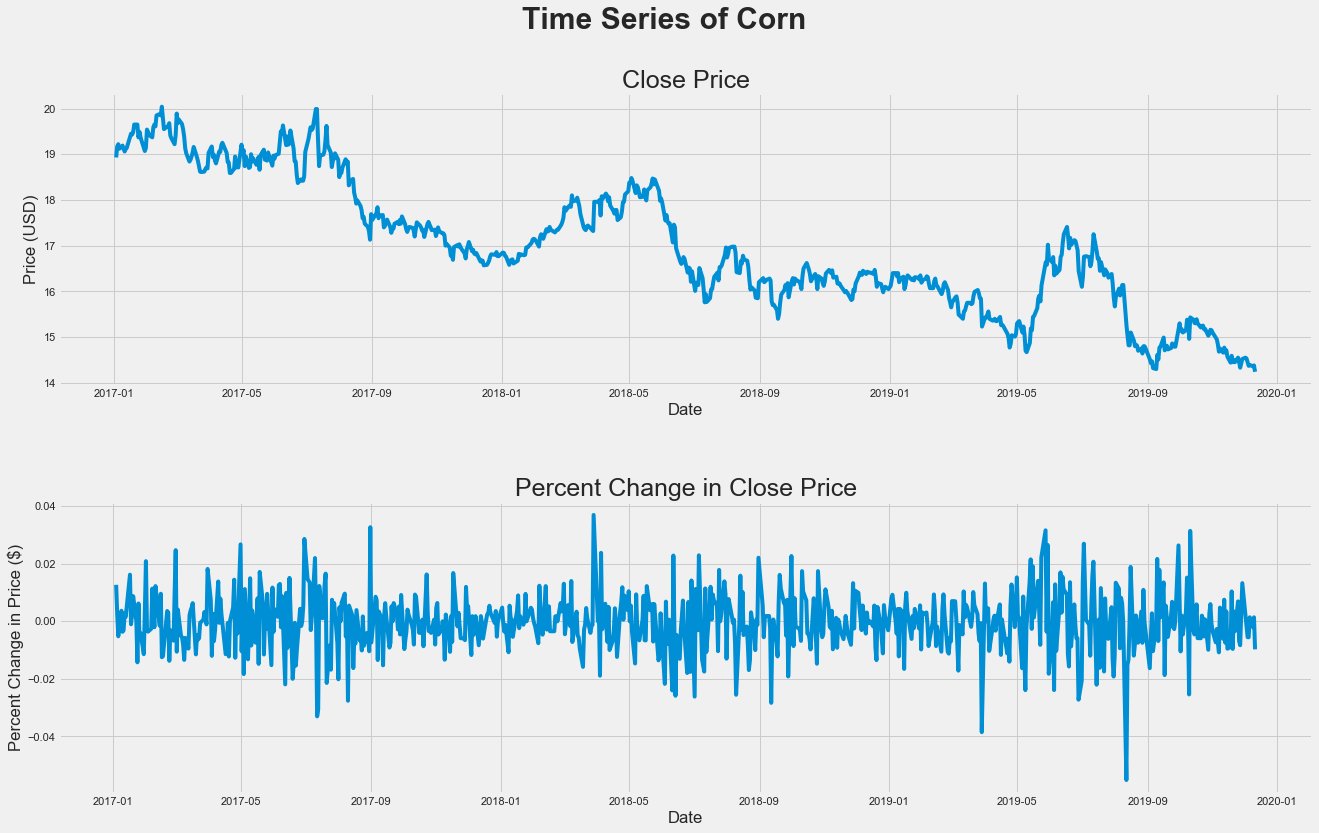

In [82]:
fig, ax = plt.subplots(2,1,figsize=(20,12))
fig.subplots_adjust(hspace=0.4)

ax[0].plot(corn_df.Date, corn_df.Close)

ax[0].set_title('\nClose Price', fontsize=25)
ax[0].set_ylabel('Price (USD)')
ax[0].set_xlabel('Date')


ax[1].plot(corn_df.Date, corn_df.perc_change)

ax[1].set_title('\nPercent Change in Close Price', fontsize=25)
ax[1].set_ylabel('Percent Change in Price ($)')
ax[1].set_xlabel('Date')

fig.suptitle('Time Series of Corn', fontsize=30, fontweight='bold')

In [83]:
fig, ax = plt.subplots(2,1,figsize=(20,12))
fig.subplots_adjust(hspace=0.4)

ax[0].plot(corn_df.Date, corn_df.Close)

ax[0].set_title('\nClose Price', fontsize=25)
ax[0].set_ylabel('Price (USD)')
ax[0].set_xlabel('Date')


ax[1].plot(corn_df.Date, corn_df.vol_30)

ax[1].set_title('\nThirty Day Volatility', fontsize=25)
ax[1].set_ylabel('Volatility')
ax[1].set_xlabel('Date')

fig.suptitle('Time Series of Corn', fontsize=30, fontweight='bold')

Text(0.5, 0.98, 'Time Series of Corn')

Text(0.5, 0.98, 'Correlation Plots of Corn Close Prices')

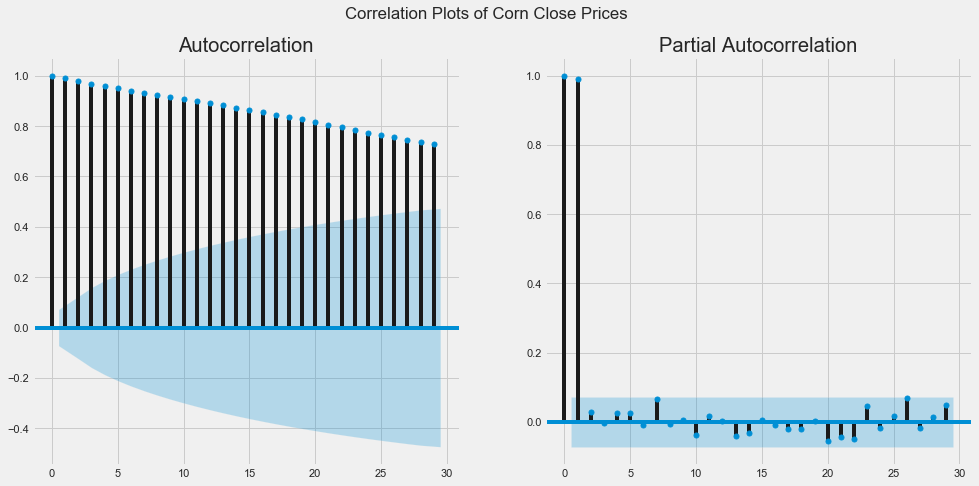

In [84]:
fig, ax = plt.subplots(1,2,figsize=(15,7))

plot_acf(corn_df.Close, ax=ax[0]);
plot_pacf(corn_df.Close, ax=ax[1]);
fig.suptitle('Correlation Plots of Corn Close Prices')

In [85]:
fig, ax = plt.subplots(1,2,figsize=(15,7))

plot_acf(corn_df.vol_30[30:], ax=ax[0], lags=60);
plot_pacf(corn_df.vol_30[30:], ax=ax[1], lags=60);
fig.suptitle('Correlation Plots of Thirty Day Vol')

/Users/wyssuser/.local/share/virtualenvs/project-zWm4Kl86/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


Text(0.5, 0.98, 'Correlation Plots of Thirty Day Vol')

In [86]:
# since vol is never below zero, maybe makes sense to Normalize the data to create a continuous outcome... 

Text(0.5, 0.98, 'Correlation Plots of Percentage Change')

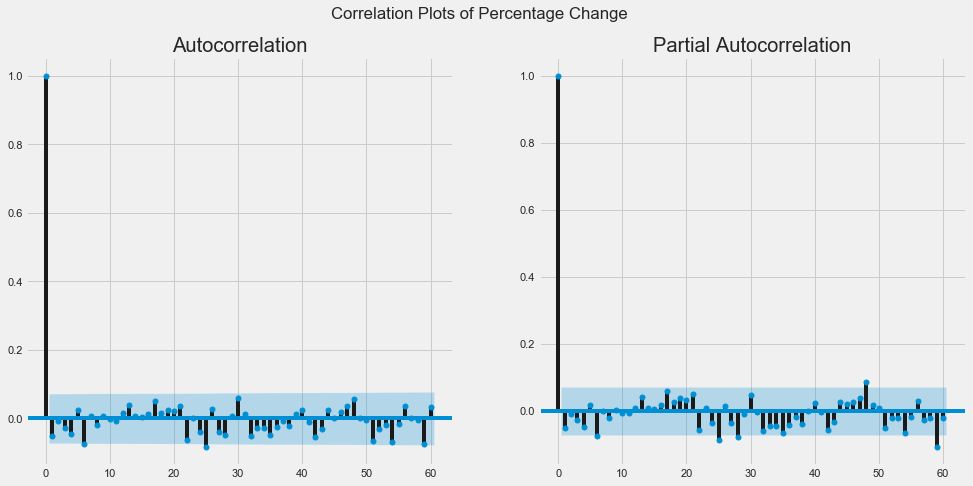

In [87]:
fig, ax = plt.subplots(1,2,figsize=(15,7))

plot_acf(corn_df.perc_change[1:], ax=ax[0], lags=60);
plot_pacf(corn_df.perc_change[1:], ax=ax[1], lags=60);
fig.suptitle('Correlation Plots of Percentage Change')


In [88]:
corn_df.Close.mean()

16.97614035897436

In [89]:
corn_df.Next_Day_Change.mean()

-0.006337837837837837

In [90]:
corn_df.Next_Day_Change.std()

0.17007036202525097

In [91]:
corn_df.head()

Date       Open       High        Low      Close  Adj Close  Volume  Next_Day_Change  Next_Day_Change_bin  vol_30  perc_change
0 2017-01-03  18.799999  19.059999  18.799999  18.930000  18.930000  111000         0.240000                    1     NaN          NaN
1 2017-01-04  19.040001  19.170000  18.940001  19.170000  19.170000  103700         0.049999                    1     NaN     0.012678
2 2017-01-05  19.160000  19.290001  19.110001  19.219999  19.219999   74700        -0.099998                    0     NaN     0.002608
3 2017-01-06  19.219999  19.219999  19.030001  19.120001  19.120001   32400         0.070000                    1     NaN    -0.005203
4 2017-01-09  19.070000  19.209999  19.000000  19.190001  19.190001   65200        -0.070000                    0     NaN     0.003661

__________

## Model Building

In [92]:
# length of the desired test set
len(corn_df)*0.3

222.29999999999998

In [93]:
train = corn_df.Close[:-222]
test = corn_df.Close[-222:]

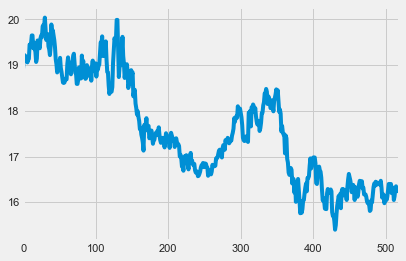

In [94]:
train.plot()

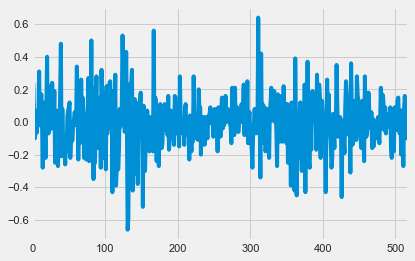

In [95]:
train.diff().plot()

In [96]:
ar1 = ARIMA(train, (1,1,0)).fit()

In [97]:
type(ar1)

statsmodels.tsa.arima_model.ARIMAResultsWrapper

Text(0.5, 0.98, 'AR(1) Correlation Plots of Residuals')

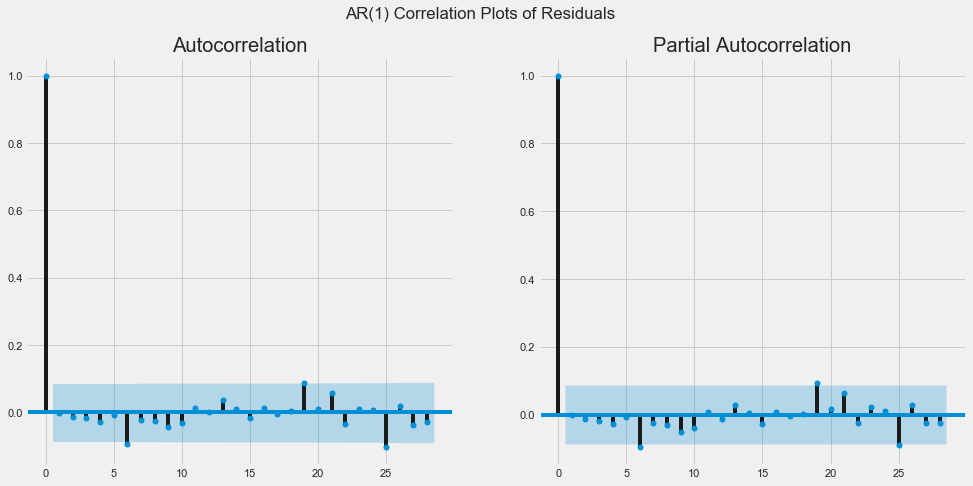

In [98]:
fig, ax = plt.subplots(1,2,figsize=(15,7))

plot_acf(ar1.resid, ax=ax[0]);
plot_pacf(ar1.resid, ax=ax[1]); 
fig.suptitle('AR(1) Correlation Plots of Residuals')

In [99]:
fig, ax = plt.subplots(1,2,figsize=(15,7))

plot_acf(ar1.resid**2, ax=ax[0]);
plot_pacf(ar1.resid**2, ax=ax[1]); 
fig.suptitle('AR(1) Correlation Plots of Squared Residuals')

Text(0.5, 0.98, 'AR(1) Correlation Plots of Squared Residuals')

These plots show that our model has correlated residuals, meaning that this simple AR(1) may not be sufficient to capture the complexity of the data.

In [100]:
archfit = arch.arch_model(train, mean='AR', lags=1, p=1, o=0, q=0, vol='ARCH').fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: -198.35742878328057
Iteration:      2,   Func. Count:     19,   Neg. LLF: -198.3583157586915
Iteration:      3,   Func. Count:     29,   Neg. LLF: -198.35883922113214
Iteration:      4,   Func. Count:     37,   Neg. LLF: -198.36597204754705
Iteration:      5,   Func. Count:     44,   Neg. LLF: -198.3882886711995
Iteration:      6,   Func. Count:     50,   Neg. LLF: -198.38840368223197
Iteration:      7,   Func. Count:     56,   Neg. LLF: -198.38840521201377
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -198.3884052121547
            Iterations: 7
            Function evaluations: 56
            Gradient evaluations: 7


/Users/wyssuser/.local/share/virtualenvs/project-zWm4Kl86/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.02756. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)


In [101]:
arch_preds = archfit.forecast(horizon=len(test)).mean.iloc[-1,:]

In [102]:
ar1_test_preds = ar1.predict(test.index[0], test.index[-1], typ='levels')
ar1_train_preds = ar1.predict(typ='levels')


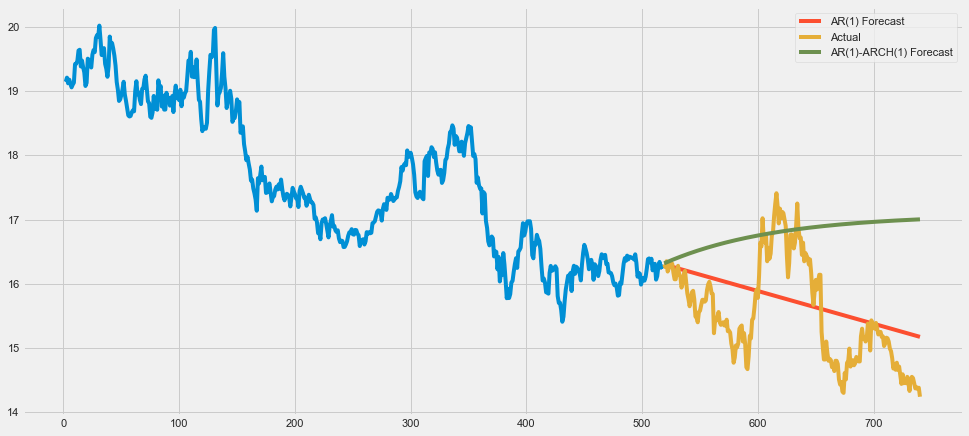

In [103]:
fig, ax = plt.subplots(figsize=(15,7))

ax.plot(train.index[2:], ar1_train_preds)
ax.plot(test.index, ar1_test_preds, label='AR(1) Forecast')
ax.plot(test.index, test.values, label='Actual')
ax.plot(test.index, arch_preds.values, label='AR(1)-ARCH(1) Forecast')
ax.legend()

In [104]:
ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                  518
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 195.119
Method:                       css-mle   S.D. of innovations              0.166
Date:                Wed, 11 Dec 2019   AIC                           -384.239
Time:                        23:29:27   BIC                           -371.489
Sample:                             1   HQIC                          -379.243
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0051      0.007     -0.749      0.454      -0.018       0.008
ar.L1.D.Close    -0.0719      0.044     -1.639      0.102      -0.158       0.014
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -13.9033           +0.0000j           13.9033            0.5000
-----------------------------------------------------------------------------
"""

In [105]:
# augmented dickey fuller; null is that time series is random walk (i.e. $\phi$=1)
# result shows we that it may be, which is why we difference (i.e. ARIMA)
print(sm.tsa.adfuller(train)[1])

0.4775248630783901


In [106]:
print(sm.tsa.adfuller(train.diff()[1:])[1])

0.0


In [107]:
mse = mean_squared_error(test, ar1_test_preds)
print(f'MSE for our AR(1) model is {mse}')

MSE for our AR(1) model is 0.49177427705791843


Let's just include $x_{t-1}$ in our linear model with all those other elements.

In [108]:
tweets.columns

Index(['created_at', 'full_text', 'entities', 'in_reply_to_screen_name', 'source', 'retweet_count', 'favorite_count', 'cleared_text', 'tokens', 'text_lemmatized', 'spacy_doc', 'bigrams', 'sentiment_polarity', 'country', 'person', 'organization', 'trigrams', 'Date', 'great', 'people', 'democrat', 'president', 'news', 'border', 'year', 'thank', 'big', 'fake', 'job', 'trump', 'time', 'usa', 'want', 'new', 'republican', 'american', 'good', 'america', 'today', 'medium', 'vote', 'china', 'bi_fake_news', 'bi_witch_hunt', 'bi_america_great', 'bi_news_media', 'bi_white_house', 'bi_north_korea', 'bi_new_york', 'bi_border_security', 'bi_great_job', 'bi_crooked_hillary', 'bi_great_honor', 'bi_president_trump', 'bi_southern_border', 'bi_great_state', 'bi_tax_cuts', 'bi_prime_minister', 'bi_law_enforcement', 'bi_look_forward', 'bi_hillary_clinton', 'bi_stock_market', 'bi_american_people', 'bi_working_hard', 'bi_supreme_court', 'bi_military_vets', 'bi_republican_party', 'num_hashtags', 'Tue', 'Wed', 

In [109]:
tweets.head()

created_at                                          full_text                                           entities in_reply_to_screen_name                                             source  retweet_count  favorite_count                                       cleared_text                                             tokens                                    text_lemmatized                                          spacy_doc                                            bigrams  ...  bi_american_people  bi_working_hard bi_supreme_court bi_military_vets bi_republican_party num_hashtags  Tue  Wed  Thur  Fri  Sat  Sun
0 2018-10-31 19:24:22+00:00  Yesterday in Pittsburgh I was really impressed...  {'hashtags': [], 'symbols': [], 'user_mentions...                    None  <a href="http://twitter.com/download/iphone" r...          13036           57519  yesterday in pittsburgh i was really impressed...  [yesterday, pittsburgh, impressed, congressman...  [yesterday, pittsburgh, impressed, congressman...  (yesterday, in, pittsburgh, i, was, really, im...  [(yesterday, pittsburgh), (pittsburgh, impress...  ...                   0                0                0                0                   0            0    0    1     0    0    0    0
1 2018-01-25 00:27:00+00:00  Will soon be heading to Davos, Switzerland, to...  {'hashtags': [], 'symbols': [], 'user_mentions...                    None  <a href="http://twitter.com/download/iphone" r...          24215          138214  will soon be heading to davos switzerland to t...  [soon, heading, davos, switzerland, tell, worl...  [soon, heading, davos, switzerland, tell, worl...  (will, soon, be, heading, to, davos, switzerla...  [(soon, heading), (heading, davos), (davos, sw...  ...                   0                0                0                0                   0            0    0    0     1    0    0    0
2 2018-09-22 01:05:00+00:00  Thank you Missouri - I love you!\nhttps://t.co...  {'hashtags': [], 'symbols': [], 'user_mentions...                    None  <a href="http://twitter.com/download/iphone" r...          13068           55764                   thank you missouri  i love you\n                            [thank, missouri, love]                            [thank, missouri, love]        (thank, you, missouri,  , i, love, you, \n)              [(thank, missouri), (missouri, love)]  ...                   0                0                0                0                   0            0    0    0     0    0    1    0
3 2018-01-04 11:11:45+00:00  As Americans, you need identification, sometim...  {'hashtags': [], 'symbols': [], 'user_mentions...                    None  <a href="http://twitter.com/download/iphone" r...          34630          139844  as americans you need identification sometimes...  [americans, need, identification, strong, accu...  [american, need, identification, strong, accur...  (as, americans, you, need, identification, som...  [(americans, need), (need, identification), (i...  ...                   0                0                0                0                   0            0    0    0     1    0    0    0
4 2017-06-16 22:32:20+00:00  "National Security Presidential Memorandum on ...  {'hashtags': [], 'symbols': [], 'user_mentions...                    None  <a href="http://twitter.com/download/iphone" r...           8070           39011  national security presidential memorandum on s...  [national, security, presidential, memorandum,...  [national, security, presidential, memorandum,...  (national, security, presidential, memorandum,...  [(national, security), (security, presidential...  ...                   0                0                0                0                   0            0    0    0     0    1    0    0

[5 rows x 74 columns]

In [110]:
dategroup = tweets.groupby('Date')
agg_date = dategroup.agg(np.sum)
agg_date.sentiment_polarity = dategroup.sentiment_polarity.agg(np.mean)

agg_date.head()

retweet_count  favorite_count  sentiment_polarity  country  great  people  democrat  president  news  border  year  thank  ...  bi_american_people  bi_working_hard  bi_supreme_court  bi_military_vets  bi_republican_party  num_hashtags  Tue  Wed  Thur  Fri  Sat  Sun
Date                                                                                                                                   ...                                                                                                                                           
2017-01-01          28620          114641            0.750000        0      0       0         0          0     0       0     0      0  ...                   0                0                 0                 0                    0             2    0    0     0    0    0    1
2017-01-02         101627          416672            0.126407        0      1       0         0          0     0       0     1      0  ...                   0                0                 0                 0                    0             0    0    0     0    0    0    0
2017-01-03         125138          509860           -0.031875        0      1       2         1          0     1       1     0      1  ...                   0                0                 0                 0                    0             1   10    0     0    0    0    0
2017-01-04         132883          523763           -0.109201        0      0       1         0          0     0       0     2      1  ...                   0                0                 0                 0                    0             1    0   10     0    0    0    0
2017-01-05          91562          374513           -0.065442        0      0       1         0          0     0       1     0      0  ...                   0                0                 0                 0                    0             0    0    0     6    0    0    0

[5 rows x 60 columns]

In [111]:
corn_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Next_Day_Change', 'Next_Day_Change_bin', 'vol_30', 'perc_change'], dtype='object')

In [112]:
data = agg_date.merge(corn_df[['Date', 'Close']], left_index=True, right_on='Date')
data.head()

retweet_count  favorite_count  sentiment_polarity  country  great  people  democrat  president  news  border  year  thank  ...  bi_supreme_court  bi_military_vets  bi_republican_party  num_hashtags  Tue  Wed  Thur  Fri  Sat  Sun       Date      Close
0         125138          509860           -0.031875        0      1       2         1          0     1       1     0      1  ...                 0                 0                    0             1   10    0     0    0    0    0 2017-01-03  18.930000
1         132883          523763           -0.109201        0      0       1         0          0     0       0     2      1  ...                 0                 0                    0             1    0   10     0    0    0    0 2017-01-04  19.170000
2          91562          374513           -0.065442        0      0       1         0          0     0       1     0      0  ...                 0                 0                    0             0    0    0     6    0    0    0 2017-01-05  19.219999
3         160769          643158            0.087222        0      2       0         0          0     0       0     0      0  ...                 0                 0                    0             0    0    0     0   12    0    0 2017-01-06  19.120001
4         149158          646497            0.123601        0      1       0         0          0     0       0     1      1  ...                 0                 0                    0             0    0    0     0    0    0    0 2017-01-09  19.190001

[5 rows x 62 columns]

In [113]:
data['last_close'] = data.Close.shift(1)
data['diff'] = data['Close'] - data['last_close']
data['dir'] = (data['diff']>0).astype('int')
data.head()

retweet_count  favorite_count  sentiment_polarity  country  great  people  democrat  president  news  border  year  thank  ...  num_hashtags  Tue  Wed  Thur  Fri  Sat  Sun       Date      Close  last_close      diff  dir
0         125138          509860           -0.031875        0      1       2         1          0     1       1     0      1  ...             1   10    0     0    0    0    0 2017-01-03  18.930000         NaN       NaN    0
1         132883          523763           -0.109201        0      0       1         0          0     0       0     2      1  ...             1    0   10     0    0    0    0 2017-01-04  19.170000   18.930000  0.240000    1
2          91562          374513           -0.065442        0      0       1         0          0     0       1     0      0  ...             0    0    0     6    0    0    0 2017-01-05  19.219999   19.170000  0.049999    1
3         160769          643158            0.087222        0      2       0         0          0     0       0     0      0  ...             0    0    0     0   12    0    0 2017-01-06  19.120001   19.219999 -0.099998    0
4         149158          646497            0.123601        0      1       0         0          0     0       0     1      1  ...             0    0    0     0    0    0    0 2017-01-09  19.190001   19.120001  0.070000    1

[5 rows x 65 columns]

In [114]:
data.columns

Index(['retweet_count', 'favorite_count', 'sentiment_polarity', 'country', 'great', 'people', 'democrat', 'president', 'news', 'border', 'year', 'thank', 'big', 'fake', 'job', 'trump', 'time', 'usa', 'want', 'new', 'republican', 'american', 'good', 'america', 'today', 'medium', 'vote', 'china', 'bi_fake_news', 'bi_witch_hunt', 'bi_america_great', 'bi_news_media', 'bi_white_house', 'bi_north_korea', 'bi_new_york', 'bi_border_security', 'bi_great_job', 'bi_crooked_hillary', 'bi_great_honor', 'bi_president_trump', 'bi_southern_border', 'bi_great_state', 'bi_tax_cuts', 'bi_prime_minister', 'bi_law_enforcement', 'bi_look_forward', 'bi_hillary_clinton', 'bi_stock_market', 'bi_american_people', 'bi_working_hard', 'bi_supreme_court', 'bi_military_vets', 'bi_republican_party', 'num_hashtags', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun', 'Date', 'Close', 'last_close', 'diff', 'dir'], dtype='object')

In [115]:
data.shape

(709, 65)

In [116]:
# add interaction features
for col in data.columns:
    if col in ('sentiment_polarity', 'Date', 'Close', 'diff', 'dir'):
        continue
    data[f'{col}_sentiment'] = data.sentiment_polarity * data[col]

In [117]:
data.shape

(709, 125)

In [118]:
data.isna().sum()

retweet_count                    0
favorite_count                   0
sentiment_polarity               0
country                          0
great                            0
people                           0
democrat                         0
president                        0
news                             0
border                           0
year                             0
thank                            0
big                              0
fake                             0
job                              0
trump                            0
time                             0
usa                              0
want                             0
new                              0
republican                       0
american                         0
good                             0
america                          0
today                            0
medium                           0
vote                             0
china                            0
bi_fake_news        

In [119]:
# there is one na in the last_open; drop na
data.dropna(inplace=True)

In [120]:
# drop DATE because I'm not sure the model can handle dates... 
xtrain, xtest, ytrain, ytest = train_test_split(data.drop(['Close', 'Date','diff','dir'], axis=1), data['diff'], test_size=0.3, random_state=10)


In [121]:
lm_overfit = LinearRegression().fit(xtrain, ytrain)

In [122]:
# training R^2 score
r2_score(ytrain, lm_overfit.predict(xtrain))

0.22995984627538313

In [123]:
# testing R^2 score
r2_score(ytest, lm_overfit.predict(xtest))

-0.50109805876697

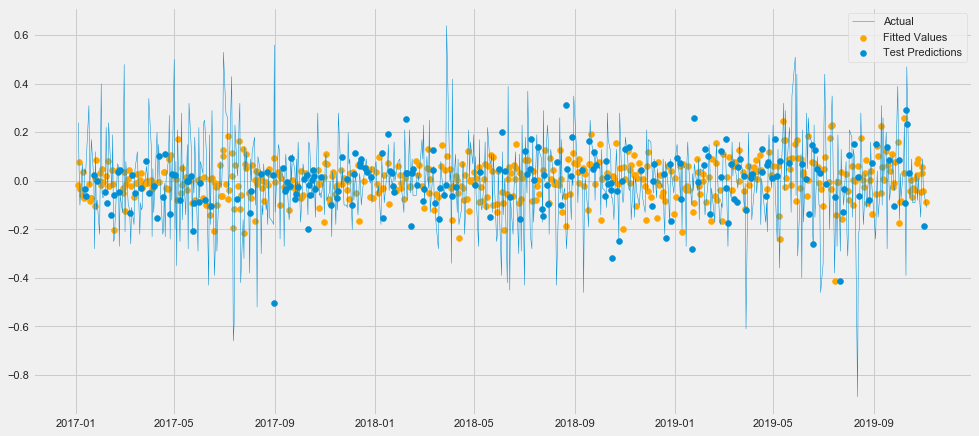

In [124]:
# plot the time series, using date as x-axis and predicted values as y-axis
fig, ax = plt.subplots(figsize=(15,7))

ax.plot(data.Date, data['diff'], linewidth=0.5, label='Actual')
ax.scatter(data.loc[xtrain.index, 'Date'], lm_overfit.predict(xtrain), color='orange', label='Fitted Values')
ax.scatter(data.loc[xtest.index, 'Date'], lm_overfit.predict(xtest), label='Test Predictions')
ax.legend()

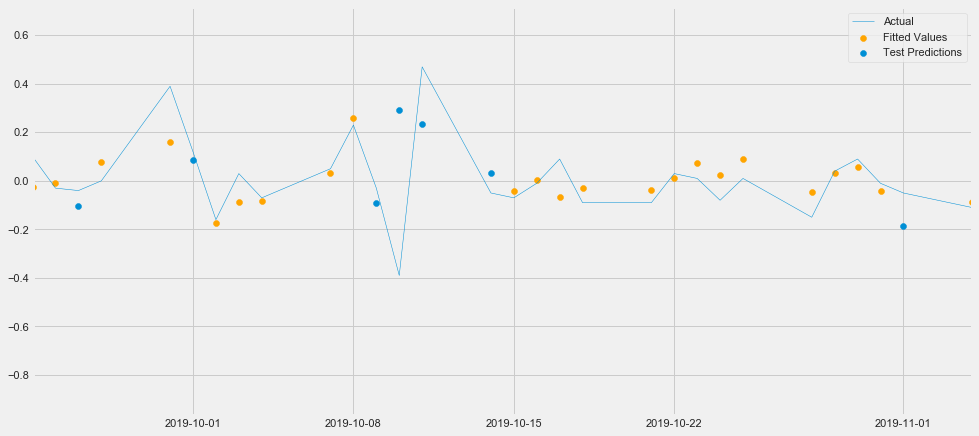

In [125]:

fig, ax = plt.subplots(figsize=(15,7))

ax.plot(data.Date, data['diff'], linewidth=0.5, label='Actual')
ax.scatter(data.loc[xtrain.index, 'Date'], lm_overfit.predict(xtrain), color='orange', label='Fitted Values')
ax.scatter(data.loc[xtest.index, 'Date'], lm_overfit.predict(xtest), label='Test Predictions')
ax.set_xlim(data.Date.iloc[-30], data.Date.iloc[-1])
ax.legend()

# Random numbers model

In [126]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(['Close', 'Date','diff','dir'], axis=1), data['dir'], test_size=0.3, random_state=10)

train_results = []
test_results = []
for i in range(10000):
    train_preds = np.random.binomial(1,0.5,len(x_train))
    test_preds = np.random.binomial(1,0.5,len(x_test))
    train_results.append(accuracy_score(y_train, train_preds))
    test_results.append(accuracy_score(y_test, test_preds))
    

print(f'Random numbers accuracy score for train {np.mean(train_results)}')
print(f'Random numbers accuracy score for test {np.mean(test_results)}')

Random numbers accuracy score for train 0.5000587878787879
Random numbers accuracy score for test 0.5008446009389671


# Decision tree model

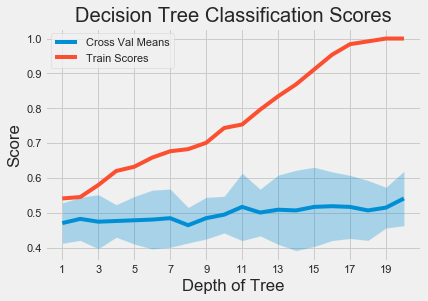

In [127]:
depths = list(range(1, 21))

def calc_meanstd(X_train, y_train, depths):
    tree = DecisionTreeClassifier(max_depth=depths, random_state=10)
    score = cross_val_score(tree, X_train, y_train, cv=5)
    cvmeans = score.mean()
    cvstds = score.std()
    train_scores = tree.fit(x_train, y_train).score(x_train, y_train)
    return [cvmeans, cvstds , train_scores]

results = []
for i in depths:
    results.append(calc_meanstd(x_train, y_train, i))

cvmeans = np.array([results[i][0] for i in range(20)])
cvstds = np.array([results[i][1] for i in range(20)])
train_scores = np.array([results[i][2] for i in range(20)])

fig, ax = plt.subplots()

ax.plot(depths, cvmeans, label='Cross Val Means')
ax.plot(depths, train_scores, label='Train Scores')
lower_bound = cvmeans - (2*cvstds)
upper_bound = cvmeans + (2*cvstds)
ax.fill_between(depths, lower_bound, upper_bound, alpha=0.3)
ax.set_title('Decision Tree Classification Scores')
ax.set_ylabel('Score')
ax.set_xlabel('Depth of Tree')
ax.set_xticks(range(1,20, 2))
ax.legend()

 Decision tree accuracy score for train set is: 0.620. 
 Decision tree accuracy score for test set is: 0.573.


Text(0.5, 1.0, 'Decision Tree of depth 4 Cross Validation scores')

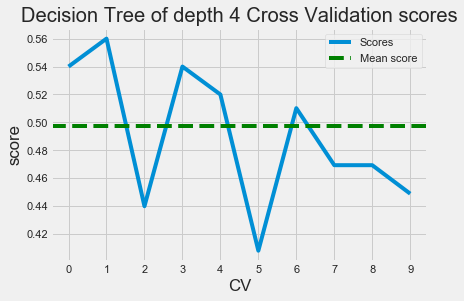

In [128]:
tree = DecisionTreeClassifier(max_depth=4, random_state=10)
score = cross_val_score(tree, x_train, y_train, cv=10)
train_scores = tree.fit(x_train, y_train).score(x_train, y_train)
print(f' Decision tree accuracy score for train set is: {accuracy_score(y_train, tree.predict(x_train)):.3f}. \n Decision tree accuracy score for test set is: {accuracy_score(y_test, tree.predict(x_test)):.3f}.')


sns.lineplot(data=score)
plt.axhline(y=np.mean(cvmeans), c='green', ls='--')
plt.legend(labels=['Scores', 'Mean score'])
plt.xlabel('CV')
plt.ylabel('score')
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.title('Decision Tree of depth 4 Cross Validation scores')

In [129]:
tree = DecisionTreeClassifier(max_depth=4, max_leaf_nodes = 2, min_samples_leaf = 20,
                            min_samples_split = 20, min_impurity_decrease = 0.004, random_state=10)
score = cross_val_score(tree, x_train, y_train, cv=10)
train_scores = tree.fit(x_train, y_train).score(x_train, y_train)
print(f' Decision tree accuracy score for train set is: {accuracy_score(y_train, tree.predict(x_train)):.3f}. \n Decision tree accuracy score for test set is: {accuracy_score(y_test, tree.predict(x_test)):.3f}.')


sns.lineplot(data=score)
plt.axhline(y=np.mean(cvmeans), c='green', ls='--')
plt.legend(labels=['Scores', 'Mean score'])
plt.xlabel('CV')
plt.ylabel('score')
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.title('Decision Tree of depth 4 Cross Validation scores')

 Decision tree accuracy score for train set is: 0.541. 
 Decision tree accuracy score for test set is: 0.549.


Text(0.5, 1.0, 'Decision Tree of depth 4 Cross Validation scores')

# Random forest model

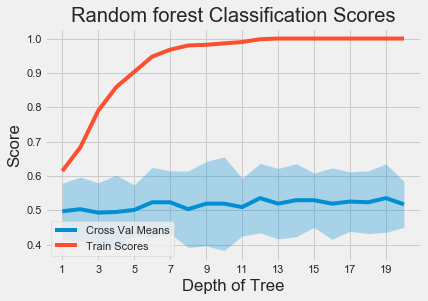

In [130]:
depths = list(range(1, 21))

def calc_meanstd(X_train, y_train, depths):
    rf = RandomForestClassifier(n_estimators=300, max_depth=depths, random_state=10).fit(x_train, y_train)
    score = cross_val_score(rf, X_train, y_train, cv=5)
    cvmeans = score.mean()
    cvstds = score.std()
    train_scores = rf.fit(x_train, y_train).score(x_train, y_train)
    return [cvmeans, cvstds , train_scores]

results = []
for i in depths:
    results.append(calc_meanstd(x_train, y_train, i))

cvmeans = np.array([results[i][0] for i in range(20)])
cvstds = np.array([results[i][1] for i in range(20)])
train_scores = np.array([results[i][2] for i in range(20)])

fig, ax = plt.subplots()
ax.plot(depths, cvmeans, label='Cross Val Means')
ax.plot(depths, train_scores, label='Train Scores')
lower_bound = cvmeans - (2*cvstds)
upper_bound = cvmeans + (2*cvstds)
ax.fill_between(depths, lower_bound, upper_bound, alpha=0.3)
ax.set_title('Random forest Classification Scores')
ax.set_ylabel('Score')
ax.set_xlabel('Depth of Tree')
ax.set_xticks(range(1,20, 2))
ax.legend()


In [131]:
rf = RandomForestClassifier(n_estimators=300, max_depth=2, random_state=10).fit(x_train, y_train)
print(f' Random forest accuracy score for train set is: {accuracy_score(y_train, rf.predict(x_train)):.3f}. \n Random Forest accuracy score for test set is: {accuracy_score(y_test, rf.predict(x_test)):.3f}.')


 Random forest accuracy score for train set is: 0.683. 
 Random Forest accuracy score for test set is: 0.531.


In [132]:
rf = RandomForestClassifier(n_estimators=300, max_depth=2, random_state=10, max_leaf_nodes=2,
                            min_samples_leaf=40,min_samples_split=300,
                           min_impurity_decrease=0.008).fit(x_train, y_train)
print(f' Random forest accuracy score for train set is: {accuracy_score(y_train, rf.predict(x_train)):.3f}. \n Random Forest accuracy score for test set is: {accuracy_score(y_test, rf.predict(x_test)):.3f}.')


 Random forest accuracy score for train set is: 0.560. 
 Random Forest accuracy score for test set is: 0.554.


# Adaptive boosting model

0.6242424242424243

0.5727699530516432

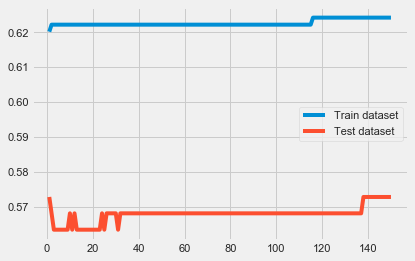

In [133]:
model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4), 
                           n_estimators=150, 
                           learning_rate=0.0001)
model.fit(x_train, y_train)
scores_train = list(model.staged_score(x_train, y_train))
scores_test = list(model.staged_score(x_test, y_test))

sns.lineplot(range(1,151), scores_train, label='Train dataset')
sns.lineplot(range(1,151), scores_test, label='Test dataset')
display(accuracy_score(y_train, model.predict(x_train)))
display(accuracy_score(y_test, model.predict(x_test)))

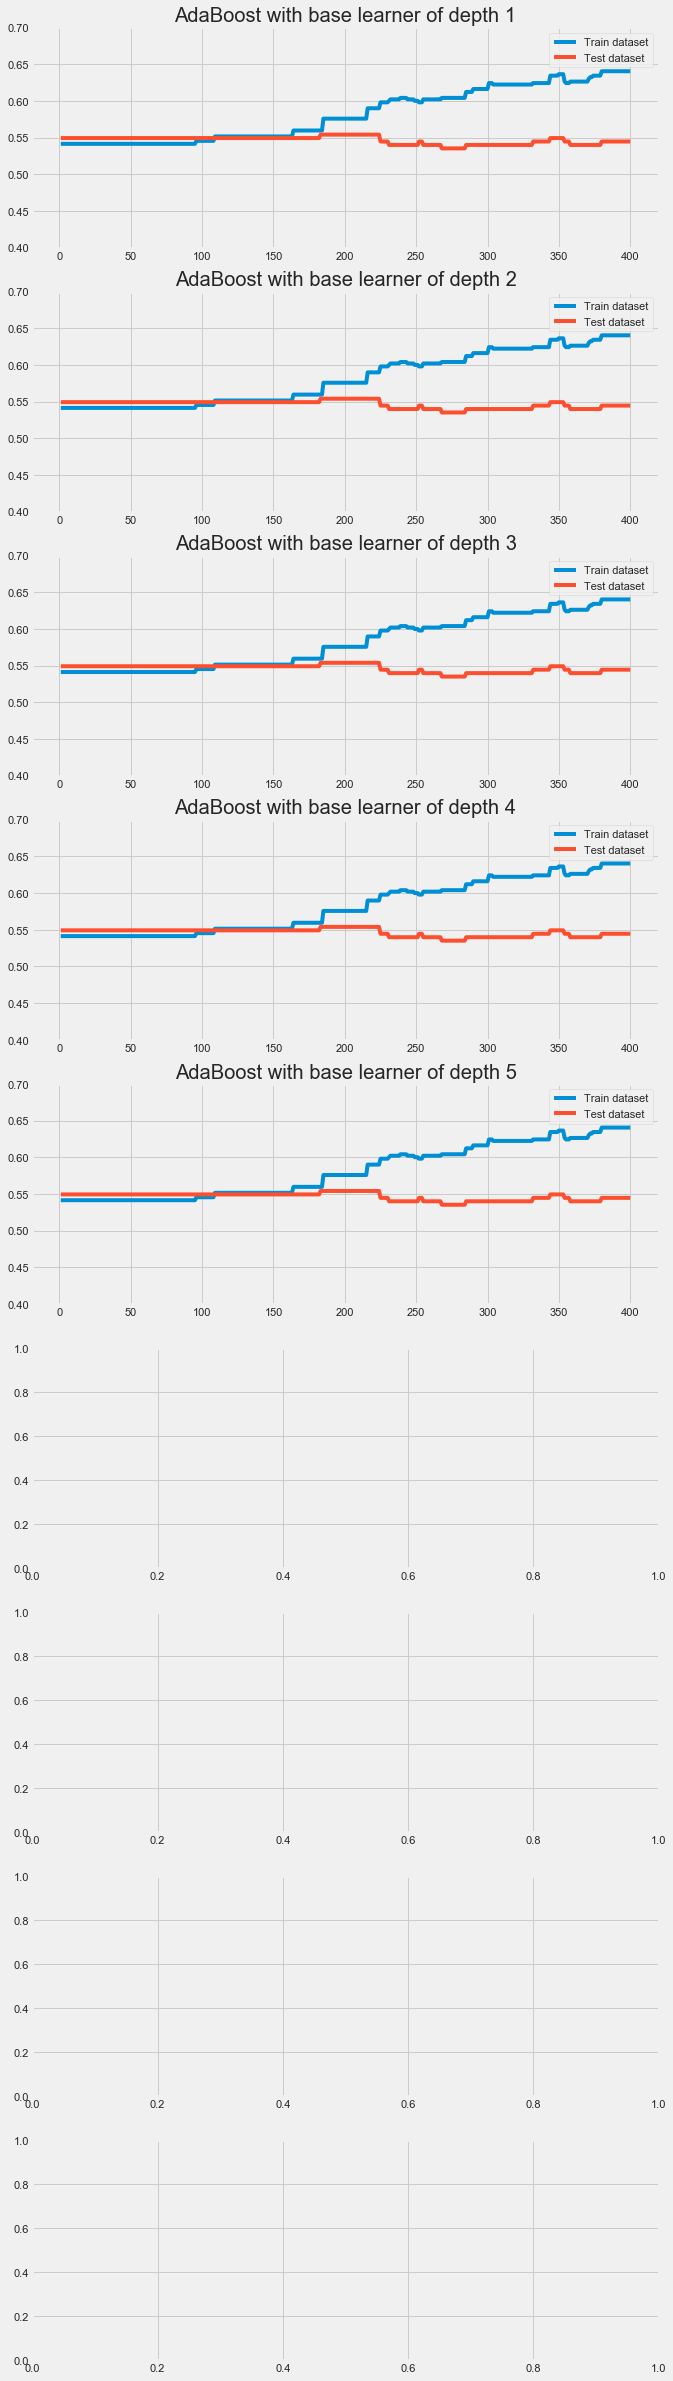

In [134]:
fig,ax = plt.subplots(9,figsize=(10,40))
for depth in range(1,6):
    model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=depth, max_leaf_nodes = 2, min_samples_leaf = 5,
                            min_samples_split = 5, min_impurity_decrease = 0.004),
                               n_estimators=400, 
                               learning_rate=0.005)
    model.fit(x_train, y_train)
    scores_train = list(model.staged_score(x_train, y_train))
    scores_test = list(model.staged_score(x_test, y_test))
    ax[depth-1].set_title(f"AdaBoost with base learner of depth {depth}")
    ax[depth-1].set_ylim(0.4,0.7)
    sns.lineplot(range(1,401), scores_train, label='Train dataset', ax=ax[depth-1])
    sns.lineplot(range(1,401), scores_test, label='Test dataset', ax=ax[depth-1])

In [135]:
model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2, max_leaf_nodes = 2, min_samples_leaf = 20,
                            min_samples_split = 20, min_impurity_decrease = 0.0004), 
                               n_estimators=200, 
                               learning_rate=0.005)
model.fit(x_train, y_train)
print(f'AdaBoost accuracy score for train set is: {accuracy_score(y_train, model.predict(x_train)):.3f}. \n AdaBoost accuracy score for test set is: {accuracy_score(y_test, model.predict(x_test)):.3f}.')


AdaBoost accuracy score for train set is: 0.598. 
 AdaBoost accuracy score for test set is: 0.549.


# Scaling data for logistics models

In [136]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Close', 'Date','diff','dir'], axis=1), data['dir'], test_size=0.3, random_state=10)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index = X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index = X_test.index)
print(X_train.head())
print(X_test.head())



     retweet_count  favorite_count  sentiment_polarity   country     great    people  democrat  president  news  border  year  thank  ...  bi_working_hard_sentiment  bi_supreme_court_sentiment  bi_military_vets_sentiment  bi_republican_party_sentiment  num_hashtags_sentiment  Tue_sentiment  Wed_sentiment  Thur_sentiment  Fri_sentiment  Sat_sentiment  Sun_sentiment  last_close_sentiment
430       0.259395        0.280516            0.518657  0.142857  0.666667  0.142857       0.0        0.0   0.0     0.0   0.0    0.2  ...                   0.210335                    0.235256                    0.009066                       0.131464                0.108408       0.619753       0.198592        0.141086       0.201616            0.0            0.0              0.527913
467       0.049060        0.062617            0.400000  0.000000  0.111111  0.142857       0.0        0.0   0.0     0.0   0.0    0.2  ...                   0.210335                    0.235256                    0.009066  

# Logistic regression

In [137]:
logr_multi = LogisticRegression(C=100000)
logr_multi.fit(X_train,y_train)
logr_multi_pred_train = logr_multi.predict(X_train)
logr_multi_pred_test = logr_multi.predict(X_test)
print(f'The accuracy score for Logistic Regression model in train set is: {accuracy_score(y_train,logr_multi_pred_train):.3f}. \nThe accuracy score for Logistic Regression model in test set is: {accuracy_score(y_test,logr_multi_pred_test):.3f}')


The accuracy score for Logistic Regression model in train set is: 0.705. 
The accuracy score for Logistic Regression model in test set is: 0.479


/Users/wyssuser/.local/share/virtualenvs/project-zWm4Kl86/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The accuracy score for Logistic Regression model in train set is: 0.705. 
The accuracy score for Logistic Regression model in test set is: 0.479


Text(0.5, 1.0, 'Logistic Regression Cross Validation scores')

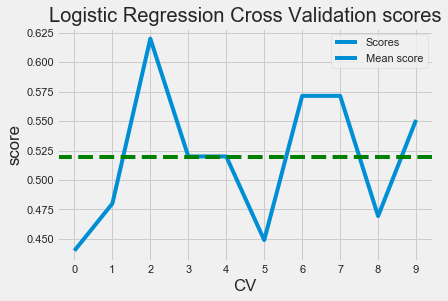

In [138]:
logr_multi_CV = LogisticRegressionCV(Cs=[10000], cv=10, max_iter=10000)
logr_multi_CV.fit(X_train,y_train)
logr_multi_CV_pred_train = logr_multi.predict(X_train)
logr_multi_CV_pred_test = logr_multi.predict(X_test)
print(f'The accuracy score for Logistic Regression model in train set is: {accuracy_score(y_train,logr_multi_CV_pred_train):.3f}. \nThe accuracy score for Logistic Regression model in test set is: {accuracy_score(y_test,logr_multi_CV_pred_test):.3f}')

sns.lineplot(data=logr_multi_CV.scores_[1])
plt.axhline(y=np.mean(logr_multi_CV.scores_[1]), c='green', ls='--')
plt.legend(labels=['Scores', 'Mean score'])
plt.xlabel('CV')
plt.ylabel('score')
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.title('Logistic Regression Cross Validation scores')


# Lasso model

In [139]:
logr_Lasso = LassoCV(cv=10, max_iter=10000)
logr_Lasso.fit(X_train, y_train)
logr_Lasso_pred_train = logr_Lasso.predict(X_train)>0.5
logr_Lasso_pred_test = logr_Lasso.predict(X_test)>0.5
print(f'Accuracy for LassoCV model in train set is: {accuracy_score(y_train,logr_Lasso_pred_train):.3f}. Accuracy for LassoCV model in test set is: {accuracy_score(y_test,logr_Lasso_pred_test):.3f}')

Accuracy for LassoCV model in train set is: 0.511. Accuracy for LassoCV model in test set is: 0.521


(2.012348948567732,
 4.060713972065382,
 0.23237822261881222,
 0.45283429734881914)

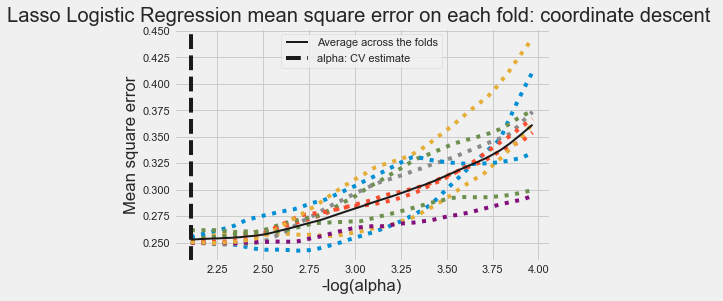

In [140]:
EPSILON = 1e-4
m_log_alphas = -np.log10(logr_Lasso.alphas_ + EPSILON)

plt.figure()
ymin, ymax = 2300, 3800
plt.plot(m_log_alphas, logr_Lasso.mse_path_, ':')
plt.plot(m_log_alphas, logr_Lasso.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(logr_Lasso.alpha_ + EPSILON), linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Lasso Logistic Regression mean square error on each fold: coordinate descent ')
plt.axis('tight')

# Ridge model

In [141]:
logr_Ridge = RidgeCV(cv=5)
logr_Ridge.fit(X_train, y_train)
logr_Ridge_pred_train = logr_Lasso.predict(X_train)>0.5
logr_Ridge_pred_test = logr_Lasso.predict(X_test)>0.5
print(f'Accuracy for RidgeCV model in train set is: {accuracy_score(y_train,logr_Ridge_pred_train):.3f}. Accuracy for RidgeCV model in test set is: {accuracy_score(y_test,logr_Ridge_pred_test):.3f}')

Accuracy for RidgeCV model in train set is: 0.511. Accuracy for RidgeCV model in test set is: 0.521


# KNN model

In [142]:
ks = list(range(1,50))
kf = KFold(n_splits=10)
best_score=1

for i in ks:
    score = list()
    for train, test in kf.split(X_train):
        knn = KNeighborsClassifier(i, n_jobs=4)
        knn.fit(X_train.iloc[train], y_train.iloc[train])

        knn_preds_test = knn.predict(X_train.iloc[test])
        score.append(1-accuracy_score(y_train.iloc[test], knn_preds_test))
    
    mean_score = np.mean(score)
    if mean_score < best_score:
        best_score=mean_score
        best_i = i

        
knn = KNeighborsClassifier(best_i, n_jobs=4)
knn.fit(X_train, y_train)
knn_preds_train = knn.predict(X_train)
knn_preds_test = knn.predict(X_test)
print(f'KNN with n_neighbors {best_i} accuracy score for train set is: {accuracy_score(y_train,knn_preds_train):.3f}. \nKNN with n_neighbors {best_i} accuracy score for test set is: {accuracy_score(y_test,knn_preds_test):.3f}.')


KNN with n_neighbors 18 accuracy score for train set is: 0.598. 
KNN with n_neighbors 18 accuracy score for test set is: 0.474.


# Neural networks

In [143]:
tf.keras.backend.clear_session()

model_overfit = tf.keras.models.Sequential()

model_overfit.add(tf.keras.layers.Dense(32, activation='relu', input_shape=(121,)))
model_overfit.add(tf.keras.layers.Dense(32, activation='relu'))
model_overfit.add(tf.keras.layers.Dense(16, activation='relu'))
model_overfit.add(tf.keras.layers.Dense(16, activation='relu'))
model_overfit.add(tf.keras.layers.Dense(1,  activation='sigmoid'))

model_overfit.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
model_overfit.summary()

history = model_overfit.fit(X_train, y_train, epochs=1000, batch_size=128, validation_split=0.3, verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                3904      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 5,777
Trainable params: 5,777
Non-trainable params: 0
_________________________________________________________________
Train on 346 samples, validate on 149 samples
Epoch 1/1000
346/346 [==============================] - 0s 1ms/sample - lo

346/346 [==============================] - 0s 45us/sample - loss: 0.0623 - accuracy: 0.9855 - val_loss: 2.0320 - val_accuracy: 0.4765
Epoch 104/1000
346/346 [==============================] - 0s 45us/sample - loss: 0.0614 - accuracy: 0.9942 - val_loss: 2.0774 - val_accuracy: 0.4765
Epoch 105/1000
346/346 [==============================] - 0s 44us/sample - loss: 0.0568 - accuracy: 0.9913 - val_loss: 2.1092 - val_accuracy: 0.4899
Epoch 106/1000
346/346 [==============================] - 0s 41us/sample - loss: 0.0543 - accuracy: 0.9913 - val_loss: 2.1118 - val_accuracy: 0.4765
Epoch 107/1000
346/346 [==============================] - 0s 44us/sample - loss: 0.0527 - accuracy: 0.9942 - val_loss: 2.1389 - val_accuracy: 0.4765
Epoch 108/1000
346/346 [==============================] - 0s 50us/sample - loss: 0.0514 - accuracy: 0.9913 - val_loss: 2.1834 - val_accuracy: 0.4832
Epoch 109/1000
346/346 [==============================] - 0s 56us/sample - loss: 0.0468 - accuracy: 0.9971 - val_loss: 2.

346/346 [==============================] - 0s 155us/sample - loss: 0.0072 - accuracy: 1.0000 - val_loss: 3.2913 - val_accuracy: 0.4698
Epoch 159/1000
346/346 [==============================] - 0s 57us/sample - loss: 0.0069 - accuracy: 1.0000 - val_loss: 3.3117 - val_accuracy: 0.4698
Epoch 160/1000
346/346 [==============================] - 0s 51us/sample - loss: 0.0066 - accuracy: 1.0000 - val_loss: 3.3246 - val_accuracy: 0.4698
Epoch 161/1000
346/346 [==============================] - 0s 41us/sample - loss: 0.0064 - accuracy: 1.0000 - val_loss: 3.3403 - val_accuracy: 0.4698
Epoch 162/1000
346/346 [==============================] - 0s 41us/sample - loss: 0.0062 - accuracy: 1.0000 - val_loss: 3.3540 - val_accuracy: 0.4698
Epoch 163/1000
346/346 [==============================] - 0s 41us/sample - loss: 0.0060 - accuracy: 1.0000 - val_loss: 3.3704 - val_accuracy: 0.4698
Epoch 164/1000
346/346 [==============================] - 0s 40us/sample - loss: 0.0060 - accuracy: 1.0000 - val_loss: 3

346/346 [==============================] - 0s 257us/sample - loss: 0.0021 - accuracy: 1.0000 - val_loss: 3.9150 - val_accuracy: 0.4698
Epoch 214/1000
346/346 [==============================] - 0s 106us/sample - loss: 0.0021 - accuracy: 1.0000 - val_loss: 3.9198 - val_accuracy: 0.4698
Epoch 215/1000
346/346 [==============================] - 0s 103us/sample - loss: 0.0020 - accuracy: 1.0000 - val_loss: 3.9272 - val_accuracy: 0.4698
Epoch 216/1000
346/346 [==============================] - 0s 67us/sample - loss: 0.0020 - accuracy: 1.0000 - val_loss: 3.9379 - val_accuracy: 0.4698
Epoch 217/1000
346/346 [==============================] - 0s 137us/sample - loss: 0.0020 - accuracy: 1.0000 - val_loss: 3.9481 - val_accuracy: 0.4698
Epoch 218/1000
346/346 [==============================] - 0s 59us/sample - loss: 0.0019 - accuracy: 1.0000 - val_loss: 3.9550 - val_accuracy: 0.4698
Epoch 219/1000
346/346 [==============================] - 0s 46us/sample - loss: 0.0019 - accuracy: 1.0000 - val_loss

Epoch 268/1000
346/346 [==============================] - 0s 50us/sample - loss: 9.8062e-04 - accuracy: 1.0000 - val_loss: 4.2602 - val_accuracy: 0.4698
Epoch 269/1000
346/346 [==============================] - 0s 56us/sample - loss: 9.6869e-04 - accuracy: 1.0000 - val_loss: 4.2635 - val_accuracy: 0.4698
Epoch 270/1000
346/346 [==============================] - 0s 101us/sample - loss: 9.5681e-04 - accuracy: 1.0000 - val_loss: 4.2688 - val_accuracy: 0.4698
Epoch 271/1000
346/346 [==============================] - 0s 52us/sample - loss: 9.4723e-04 - accuracy: 1.0000 - val_loss: 4.2745 - val_accuracy: 0.4698
Epoch 272/1000
346/346 [==============================] - 0s 52us/sample - loss: 9.4570e-04 - accuracy: 1.0000 - val_loss: 4.2796 - val_accuracy: 0.4698
Epoch 273/1000
346/346 [==============================] - 0s 63us/sample - loss: 9.2095e-04 - accuracy: 1.0000 - val_loss: 4.2831 - val_accuracy: 0.4698
Epoch 274/1000
346/346 [==============================] - 0s 81us/sample - loss: 

346/346 [==============================] - 0s 41us/sample - loss: 3.6969e-04 - accuracy: 1.0000 - val_loss: 4.6887 - val_accuracy: 0.4631
Epoch 375/1000
346/346 [==============================] - 0s 48us/sample - loss: 3.6767e-04 - accuracy: 1.0000 - val_loss: 4.6930 - val_accuracy: 0.4631
Epoch 376/1000
346/346 [==============================] - 0s 53us/sample - loss: 3.6407e-04 - accuracy: 1.0000 - val_loss: 4.6992 - val_accuracy: 0.4631
Epoch 377/1000
346/346 [==============================] - 0s 53us/sample - loss: 3.6300e-04 - accuracy: 1.0000 - val_loss: 4.7006 - val_accuracy: 0.4631
Epoch 378/1000
346/346 [==============================] - 0s 49us/sample - loss: 3.6016e-04 - accuracy: 1.0000 - val_loss: 4.7008 - val_accuracy: 0.4631
Epoch 379/1000
346/346 [==============================] - 0s 53us/sample - loss: 3.5741e-04 - accuracy: 1.0000 - val_loss: 4.7009 - val_accuracy: 0.4631
Epoch 380/1000
346/346 [==============================] - 0s 496us/sample - loss: 3.5379e-04 - ac

346/346 [==============================] - 0s 47us/sample - loss: 1.8862e-04 - accuracy: 1.0000 - val_loss: 4.9598 - val_accuracy: 0.4631
Epoch 481/1000
346/346 [==============================] - 0s 54us/sample - loss: 1.8725e-04 - accuracy: 1.0000 - val_loss: 4.9590 - val_accuracy: 0.4631
Epoch 482/1000
346/346 [==============================] - 0s 49us/sample - loss: 1.8648e-04 - accuracy: 1.0000 - val_loss: 4.9599 - val_accuracy: 0.4631
Epoch 483/1000
346/346 [==============================] - 0s 47us/sample - loss: 1.8578e-04 - accuracy: 1.0000 - val_loss: 4.9625 - val_accuracy: 0.4631
Epoch 484/1000
346/346 [==============================] - 0s 54us/sample - loss: 1.8496e-04 - accuracy: 1.0000 - val_loss: 4.9654 - val_accuracy: 0.4631
Epoch 485/1000
346/346 [==============================] - 0s 45us/sample - loss: 1.8372e-04 - accuracy: 1.0000 - val_loss: 4.9657 - val_accuracy: 0.4631
Epoch 486/1000
346/346 [==============================] - 0s 46us/sample - loss: 1.8232e-04 - acc

346/346 [==============================] - 0s 46us/sample - loss: 1.1161e-04 - accuracy: 1.0000 - val_loss: 5.1405 - val_accuracy: 0.4631
Epoch 587/1000
346/346 [==============================] - 0s 42us/sample - loss: 1.1131e-04 - accuracy: 1.0000 - val_loss: 5.1443 - val_accuracy: 0.4631
Epoch 588/1000
346/346 [==============================] - 0s 47us/sample - loss: 1.1092e-04 - accuracy: 1.0000 - val_loss: 5.1440 - val_accuracy: 0.4631
Epoch 589/1000
346/346 [==============================] - 0s 44us/sample - loss: 1.0995e-04 - accuracy: 1.0000 - val_loss: 5.1474 - val_accuracy: 0.4631
Epoch 590/1000
346/346 [==============================] - 0s 43us/sample - loss: 1.0939e-04 - accuracy: 1.0000 - val_loss: 5.1467 - val_accuracy: 0.4631
Epoch 591/1000
346/346 [==============================] - 0s 48us/sample - loss: 1.0934e-04 - accuracy: 1.0000 - val_loss: 5.1526 - val_accuracy: 0.4631
Epoch 592/1000
346/346 [==============================] - 0s 56us/sample - loss: 1.0865e-04 - acc

346/346 [==============================] - 0s 73us/sample - loss: 7.1656e-05 - accuracy: 1.0000 - val_loss: 5.2889 - val_accuracy: 0.4631
Epoch 693/1000
346/346 [==============================] - 0s 110us/sample - loss: 7.1662e-05 - accuracy: 1.0000 - val_loss: 5.2938 - val_accuracy: 0.4631
Epoch 694/1000
346/346 [==============================] - 0s 56us/sample - loss: 7.1075e-05 - accuracy: 1.0000 - val_loss: 5.2942 - val_accuracy: 0.4631
Epoch 695/1000
346/346 [==============================] - 0s 53us/sample - loss: 7.0806e-05 - accuracy: 1.0000 - val_loss: 5.2929 - val_accuracy: 0.4631
Epoch 696/1000
346/346 [==============================] - 0s 40us/sample - loss: 7.0607e-05 - accuracy: 1.0000 - val_loss: 5.2976 - val_accuracy: 0.4631
Epoch 697/1000
346/346 [==============================] - 0s 41us/sample - loss: 7.0309e-05 - accuracy: 1.0000 - val_loss: 5.2967 - val_accuracy: 0.4631
Epoch 698/1000
346/346 [==============================] - 0s 351us/sample - loss: 7.0388e-05 - a

Epoch 745/1000
346/346 [==============================] - 0s 45us/sample - loss: 5.8671e-05 - accuracy: 1.0000 - val_loss: 5.3493 - val_accuracy: 0.4631
Epoch 746/1000
346/346 [==============================] - 0s 49us/sample - loss: 5.8438e-05 - accuracy: 1.0000 - val_loss: 5.3539 - val_accuracy: 0.4631
Epoch 747/1000
346/346 [==============================] - 0s 57us/sample - loss: 5.8339e-05 - accuracy: 1.0000 - val_loss: 5.3533 - val_accuracy: 0.4631
Epoch 748/1000
346/346 [==============================] - 0s 92us/sample - loss: 5.8122e-05 - accuracy: 1.0000 - val_loss: 5.3570 - val_accuracy: 0.4631
Epoch 749/1000
346/346 [==============================] - 0s 86us/sample - loss: 5.7969e-05 - accuracy: 1.0000 - val_loss: 5.3571 - val_accuracy: 0.4631
Epoch 750/1000
346/346 [==============================] - 0s 81us/sample - loss: 5.7696e-05 - accuracy: 1.0000 - val_loss: 5.3552 - val_accuracy: 0.4631
Epoch 751/1000
346/346 [==============================] - 0s 83us/sample - loss: 5

346/346 [==============================] - 0s 46us/sample - loss: 4.0805e-05 - accuracy: 1.0000 - val_loss: 5.4612 - val_accuracy: 0.4765
Epoch 852/1000
346/346 [==============================] - 0s 49us/sample - loss: 4.0664e-05 - accuracy: 1.0000 - val_loss: 5.4598 - val_accuracy: 0.4765
Epoch 853/1000
346/346 [==============================] - 0s 46us/sample - loss: 4.0516e-05 - accuracy: 1.0000 - val_loss: 5.4602 - val_accuracy: 0.4765
Epoch 854/1000
346/346 [==============================] - 0s 48us/sample - loss: 4.0444e-05 - accuracy: 1.0000 - val_loss: 5.4660 - val_accuracy: 0.4765
Epoch 855/1000
346/346 [==============================] - 0s 53us/sample - loss: 4.0320e-05 - accuracy: 1.0000 - val_loss: 5.4646 - val_accuracy: 0.4765
Epoch 856/1000
346/346 [==============================] - 0s 48us/sample - loss: 4.0154e-05 - accuracy: 1.0000 - val_loss: 5.4647 - val_accuracy: 0.4765
Epoch 857/1000
346/346 [==============================] - 0s 52us/sample - loss: 4.0001e-05 - acc

346/346 [==============================] - 0s 51us/sample - loss: 2.9400e-05 - accuracy: 1.0000 - val_loss: 5.5535 - val_accuracy: 0.4765
Epoch 958/1000
346/346 [==============================] - 0s 43us/sample - loss: 2.9295e-05 - accuracy: 1.0000 - val_loss: 5.5534 - val_accuracy: 0.4765
Epoch 959/1000
346/346 [==============================] - 0s 52us/sample - loss: 2.9307e-05 - accuracy: 1.0000 - val_loss: 5.5569 - val_accuracy: 0.4765
Epoch 960/1000
346/346 [==============================] - 0s 58us/sample - loss: 2.9116e-05 - accuracy: 1.0000 - val_loss: 5.5548 - val_accuracy: 0.4765
Epoch 961/1000
346/346 [==============================] - 0s 51us/sample - loss: 2.9043e-05 - accuracy: 1.0000 - val_loss: 5.5544 - val_accuracy: 0.4765
Epoch 962/1000
346/346 [==============================] - 0s 165us/sample - loss: 2.8993e-05 - accuracy: 1.0000 - val_loss: 5.5563 - val_accuracy: 0.4765
Epoch 963/1000
346/346 [==============================] - 0s 207us/sample - loss: 2.8870e-05 - a

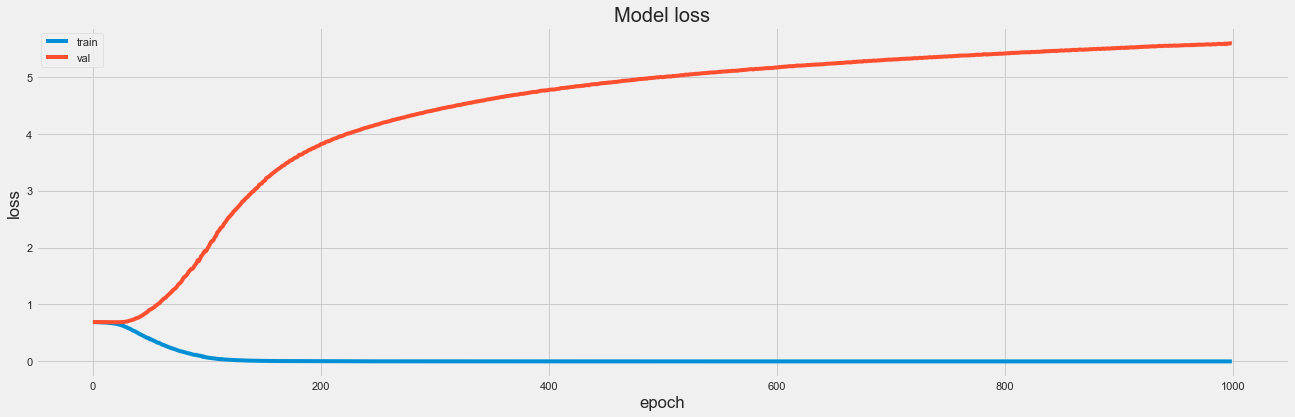

In [144]:
fig, ax = plt.subplots(1,1, figsize=(20,6))
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_title('Model loss')
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
ax.legend(['train', 'val'], loc='best')

In [145]:
train_loss, train_acc = model_overfit.evaluate(X_train.values, y_train.values, verbose=0)
print(f'Train accuracy from evaluate method={train_acc}')
print(history.history['accuracy'][-1])
print(history.history['val_accuracy'][-1])

Train accuracy from evaluate method=0.842424213886261
1.0
0.47651008


In [146]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(32, kernel_regularizer=tf.keras.regularizers.l1(0.0009), activation='relu', input_shape=(121,)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(32, kernel_regularizer=tf.keras.regularizers.l2(0.008), activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(16, kernel_regularizer=tf.keras.regularizers.l1(0.0003), activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(16, kernel_regularizer=tf.keras.regularizers.l2(0.0003), activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(1,  activation='sigmoid'))


optimizer = tf.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=optimizer)
model.summary()

earlystop_callback = tf.keras.callbacks.EarlyStopping(
  monitor='val_loss', min_delta=0.00001,
  patience=5)

history = model.fit(X_train, y_train, epochs=400, batch_size=16, validation_split=0.2, callbacks=[earlystop_callback], verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                3904      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                2

396/396 [==============================] - 0s 220us/sample - loss: 0.8162 - accuracy: 0.5833 - val_loss: 0.8258 - val_accuracy: 0.4949
Epoch 100/400
396/396 [==============================] - 0s 218us/sample - loss: 0.8164 - accuracy: 0.5505 - val_loss: 0.8244 - val_accuracy: 0.4949
Epoch 101/400
396/396 [==============================] - 0s 191us/sample - loss: 0.8162 - accuracy: 0.5833 - val_loss: 0.8227 - val_accuracy: 0.4949
Epoch 102/400
396/396 [==============================] - 0s 210us/sample - loss: 0.8073 - accuracy: 0.5859 - val_loss: 0.8208 - val_accuracy: 0.4949
Epoch 103/400
396/396 [==============================] - 0s 201us/sample - loss: 0.8112 - accuracy: 0.5884 - val_loss: 0.8185 - val_accuracy: 0.4848
Epoch 104/400
396/396 [==============================] - 0s 205us/sample - loss: 0.8139 - accuracy: 0.5126 - val_loss: 0.8178 - val_accuracy: 0.4848
Epoch 105/400
396/396 [==============================] - 0s 211us/sample - loss: 0.8092 - accuracy: 0.5455 - val_loss: 0

396/396 [==============================] - 0s 213us/sample - loss: 0.7448 - accuracy: 0.5985 - val_loss: 0.7648 - val_accuracy: 0.4848
Epoch 155/400
396/396 [==============================] - 0s 214us/sample - loss: 0.7484 - accuracy: 0.5960 - val_loss: 0.7629 - val_accuracy: 0.5455
Epoch 156/400
396/396 [==============================] - 0s 199us/sample - loss: 0.7410 - accuracy: 0.6086 - val_loss: 0.7624 - val_accuracy: 0.5354
Epoch 157/400
396/396 [==============================] - 0s 204us/sample - loss: 0.7460 - accuracy: 0.6010 - val_loss: 0.7625 - val_accuracy: 0.5051
Epoch 158/400
396/396 [==============================] - 0s 181us/sample - loss: 0.7490 - accuracy: 0.5732 - val_loss: 0.7620 - val_accuracy: 0.5152
Epoch 159/400
396/396 [==============================] - 0s 203us/sample - loss: 0.7432 - accuracy: 0.6136 - val_loss: 0.7609 - val_accuracy: 0.5354
Epoch 160/400
396/396 [==============================] - 0s 199us/sample - loss: 0.7454 - accuracy: 0.5985 - val_loss: 0

In [147]:
train_loss, train_acc = model.evaluate(X_train.values, y_train.values, verbose=0)
print(f'Train accuracy from evaluate method={train_acc}')
print(history.history['accuracy'][-1])
print(history.history['val_accuracy'][-1])

Train accuracy from evaluate method=0.6404040455818176
0.58838385
0.5252525


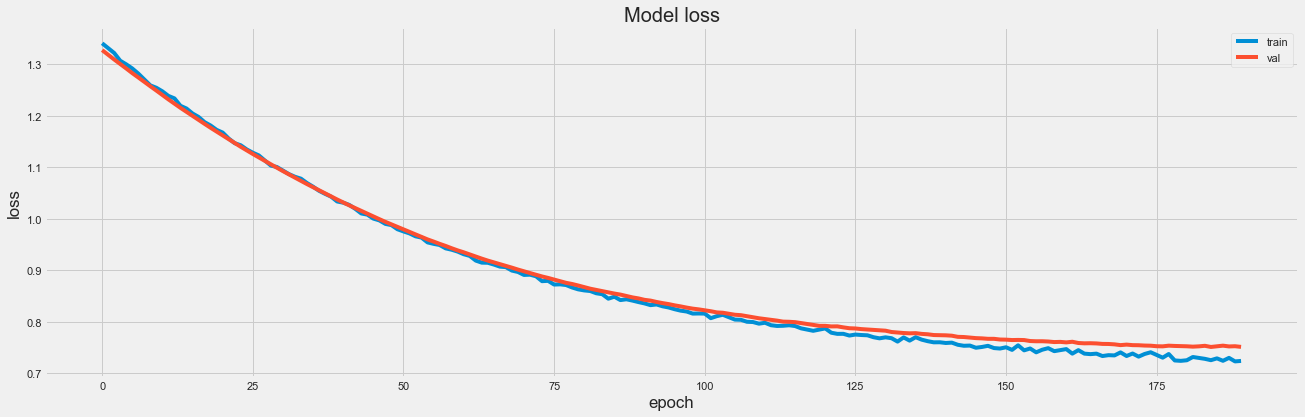

In [148]:
fig, ax = plt.subplots(1,1, figsize=(20,6))
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_title('Model loss')
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
ax.legend(['train', 'val'], loc='best')

In [149]:
train_loss, train_acc = model.evaluate(X_train.values, y_train.values, verbose=0)
test_loss, test_acc = model.evaluate(X_test.values, y_test.values, verbose=0)
print(f'NN accuracy score for train set is: {train_acc:.3f}. \nNN accuracy score for test set is: {test_acc:.3f}.')


NN accuracy score for train set is: 0.640. 
NN accuracy score for test set is: 0.465.


In [150]:
print(f'The accuracy score for Logistic Regression model in train set is: {accuracy_score(y_train,logr_multi_pred_train):.3f}. \nThe accuracy score for Logistic Regression model in test set is: {accuracy_score(y_test,logr_multi_pred_test):.3f}')
print(f'Accuracy for LassoCV model in train set is: {accuracy_score(y_train,logr_Lasso_pred_train):.3f}. Accuracy for LassoCV model in test set is: {accuracy_score(y_test,logr_Lasso_pred_test):.3f}')
print(f'Accuracy for RidgeCV model in train set is: {accuracy_score(y_train,logr_Ridge_pred_train):.3f}. Accuracy for RidgeCV model in test set is: {accuracy_score(y_test,logr_Ridge_pred_test):.3f}')
print(f'KNN with n_neighbors {best_i} accuracy score for train set is: {accuracy_score(y_train,knn_preds_train):.3f}. \nKNN with n_neighbors {best_i} accuracy score for test set is: {accuracy_score(y_test,knn_preds_test):.3f}.')

print(f' Decision tree accuracy score for train set is: {accuracy_score(y_train, tree.predict(x_train)):.3f}. \n Decision tree accuracy score for test set is: {accuracy_score(y_test, tree.predict(x_test)):.3f}.')

print(f'NN accuracy score for train set is: {train_acc:.3f}. \nNN accuracy score for test set is: {test_acc:.3f}.')


The accuracy score for Logistic Regression model in train set is: 0.705. 
The accuracy score for Logistic Regression model in test set is: 0.479
Accuracy for LassoCV model in train set is: 0.511. Accuracy for LassoCV model in test set is: 0.521
Accuracy for RidgeCV model in train set is: 0.511. Accuracy for RidgeCV model in test set is: 0.521
KNN with n_neighbors 18 accuracy score for train set is: 0.598. 
KNN with n_neighbors 18 accuracy score for test set is: 0.474.
 Decision tree accuracy score for train set is: 0.541. 
 Decision tree accuracy score for test set is: 0.549.
NN accuracy score for train set is: 0.640. 
NN accuracy score for test set is: 0.465.


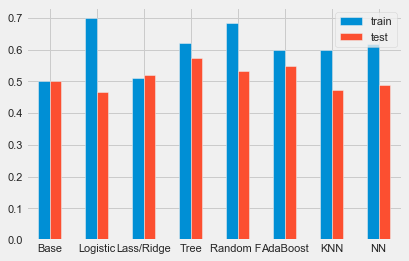

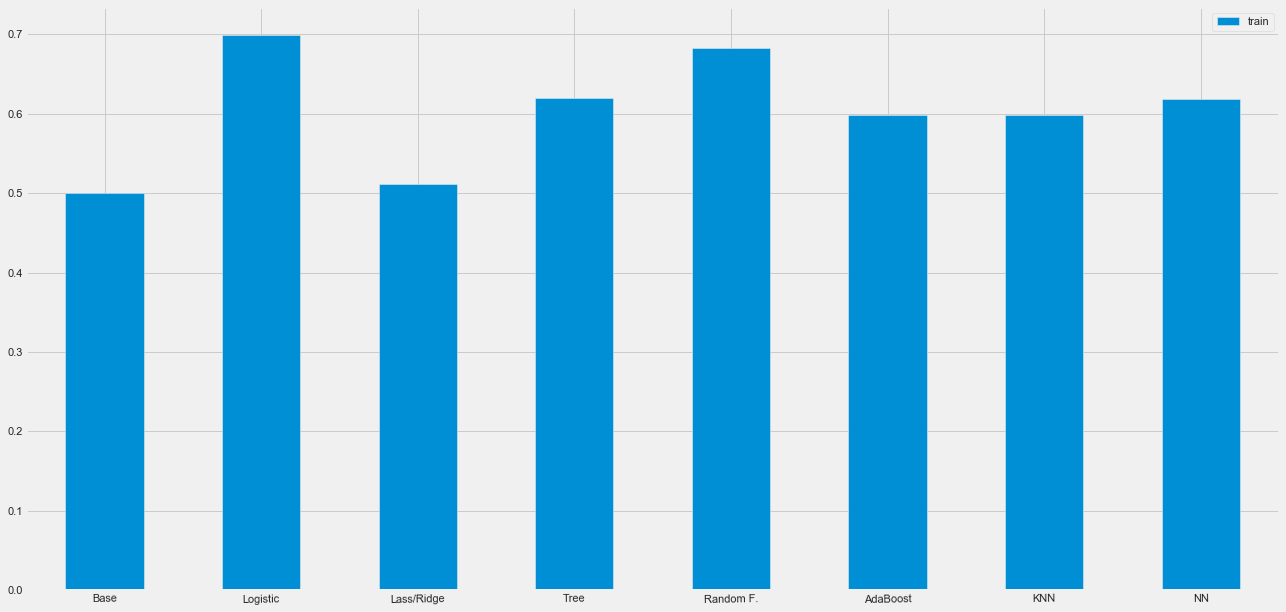

In [151]:

labels = ['Base','Logistic','Lass/Ridge','Tree','Random F.','AdaBoost','KNN','NN']
train_results = [0.499824848,0.699,0.511,0.62,0.683,0.598,0.598,0.618]
test_results  = [0.499828169,0.465,0.521,0.573,0.531,0.549,0.474,0.488]

df = pd.DataFrame({'train':train_results,'test':test_results,'label':labels},index=labels)
# ax = df.plot.bar(x='lab', y='train', rot=0)
df.plot.bar(rot=0)


ax = df.plot.bar(y='train', rot=1,figsize=(20,10))


Text(0, 0.5, 'Accuracy')

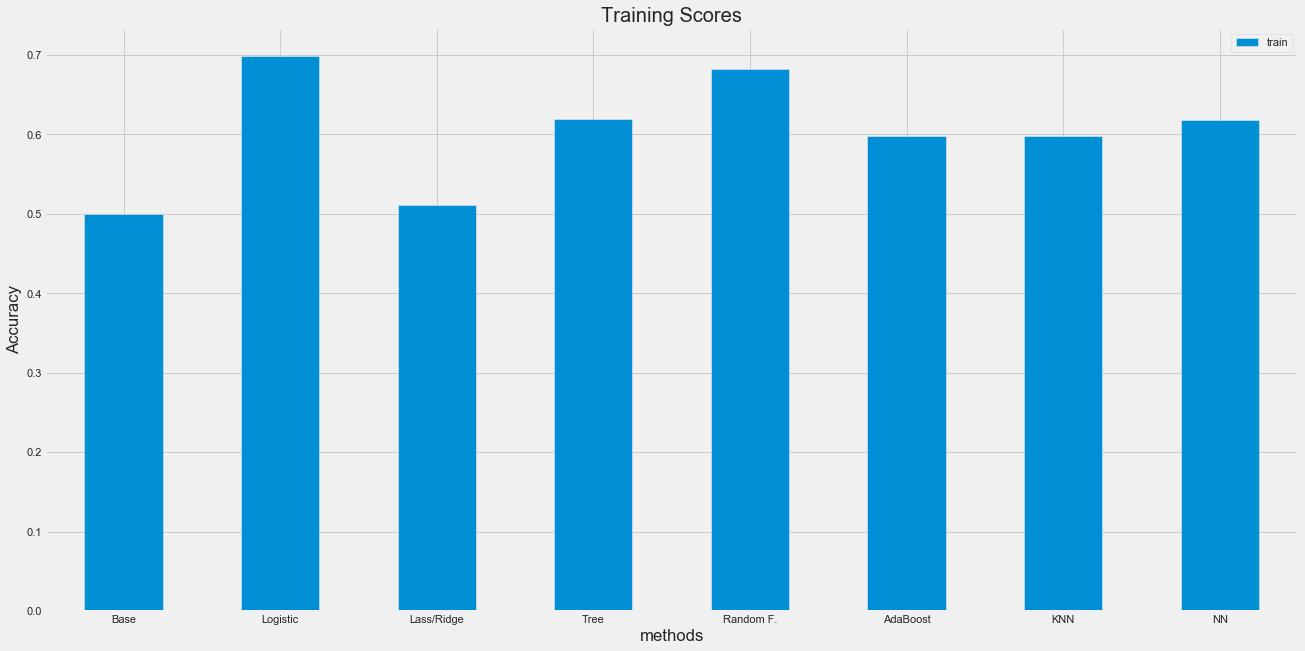

In [152]:
ax = df.plot.bar(x='label', y='train', rot=0,figsize=(20,10),title='Training Scores')
ax.set_xlabel("methods")
ax.set_ylabel("Accuracy")


Text(0, 0.5, 'Accuracy')

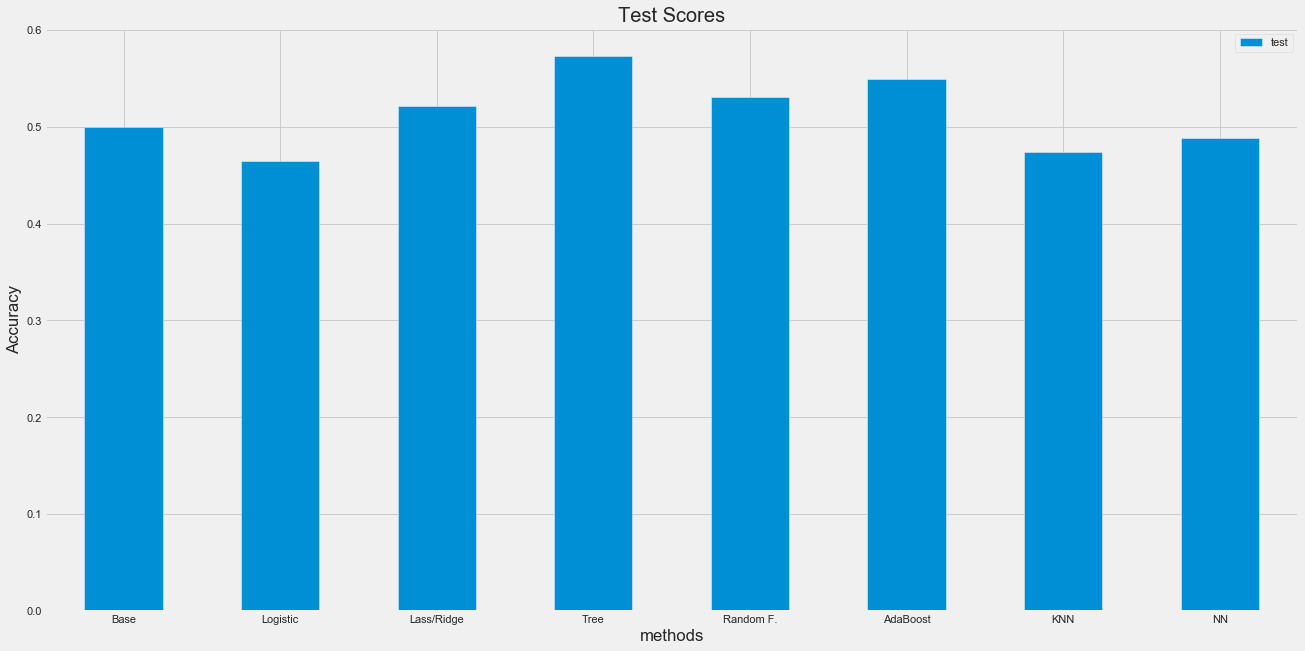

In [153]:
ax = df.plot.bar(x='label', y='test', rot=0,figsize=(20,10),title='Test Scores')
ax.set_xlabel("methods")
ax.set_ylabel("Accuracy")
